<a href="https://colab.research.google.com/github/SaurabhWhadgar/indch/blob/main/rcode_expression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pheatmap")
install.packages("stats")
install.packages("corrplot")
install.packages("knitr")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("reshape2")
install.packages("reshape")
install.packages("RcolorBrewer")
install.packages ("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘RcolorBrewer’ is not av

In [ ]:
library(pheatmap)
library(stats)
library(corrplot)
library(knitr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)
library(reshape)
library("RColorBrewer")
library("stringr")

corrplot 0.90 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘reshape’


The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename




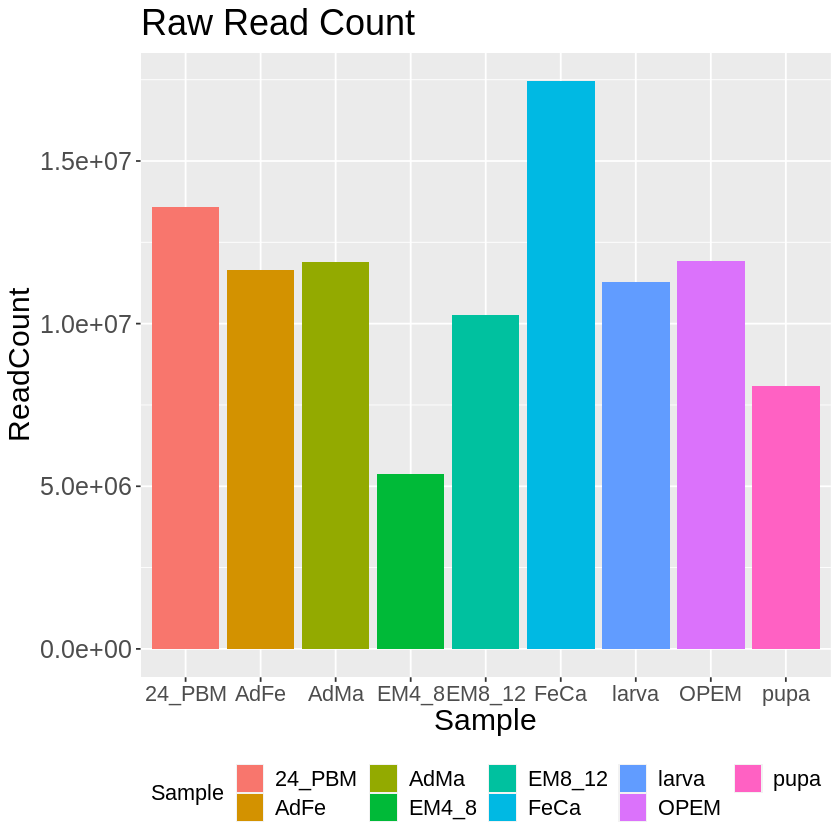

In [ ]:
# Reading File and making matrix dataframe
#/home/ibab/Documents/project/all_folders_from_ibab/all_fle_for_downsteam_after_count/gff_editted
#/home/ibab/Documents/project/rplot/count2.csv
#count2.csv contains the raw reads after mapping 
cdd <- read.csv("http://3.93.125.130/saurabh/count2.csv",header = F)
cdd$V21 <- cdd$V5-cdd$V4
cdd <- cdd[,-c(2,3,4,5,6,7,8,10,11)]
#cdd <- cdd[,-c(2,3,4,5,6,7,8)]
#colnames(cdd) <- c("chr","gene","EM0_1","EM2_4","EM4_8","EM8_12","larva","pupa","AdFe","AdMa","24_PBM","OPEM","FeCa","length")
colnames(cdd) <- c("chr","gene","EM4_8","EM8_12","larva","pupa","AdFe","AdMa","24_PBM","OPEM","FeCa","length")
#cdd <- cdd[c(1,2,3,4,5,6,8,7,9,10,11,13,12,14)]
cdd <- cdd[c(1,2,3,4,6,5,7,8,9,11,10,12)]
gff=read.csv("/content/gff_editted",header=F,sep="\t")
colnames(gff) = c("chr","start.pos","end.pos","gene.id","func")
df <- data.frame(colSums(subset(cdd, select = c(-length,-gene,-chr))))
colnames(df)<-c("ReadCount")
df$Sample <- rownames(df)
ggplot(data=df, aes(x=Sample, y=ReadCount,fill=Sample)) +
  geom_bar(stat="identity")+
  ggtitle("Raw Read Count")+theme(text = element_text(size = 18))+theme(axis.text.x = element_text(size = 13))+theme(axis.text.y = element_text(size = 15))+ theme(legend.position="bottom")+theme(legend.text=element_text(size=13))+theme(legend.title=element_text(size=13))




     EM4_8              EM8_12              Pupa              Larva         
 Min.   :   0.000   Min.   :   0.000   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   1.804   1st Qu.:   1.773   1st Qu.:   2.817   1st Qu.:   3.244  
 Median :   8.051   Median :   8.813   Median :   7.578   Median :   8.051  
 Mean   :  30.008   Mean   :  30.331   Mean   :  33.187   Mean   :  34.546  
 3rd Qu.:  25.167   3rd Qu.:  25.462   3rd Qu.:  18.297   3rd Qu.:  18.142  
 Max.   :5017.090   Max.   :6835.339   Max.   :7864.479   Max.   :6108.827  
      AdFe                AdMa              24_PBM               FeCa         
 Min.   :    0.000   Min.   :    0.00   Min.   :     0.00   Min.   :    0.00  
 1st Qu.:    2.577   1st Qu.:    3.37   1st Qu.:     0.80   1st Qu.:    0.54  
 Median :    7.689   Median :    8.15   Median :     4.00   Median :    1.59  
 Mean   :   33.610   Mean   :   34.46   Mean   :    45.67   Mean   :   24.20  
 3rd Qu.:   17.742   3rd Qu.:   17.53   3rd Qu.:    19.35   3rd Qu

,EM4_8,EM8_12,Pupa,Larva,AdFe,AdMa,24_PBM,FeCa,OPEM,gene,func,chr,start.pos,end.pos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>
1519,7.131794,1.139337,122.1734,6108.827,17.62453,31.6095,6.39119,13.19506,9.517275,ID=ANSTEP-UCI_GENE_00006661,Similar to AGAP006187: Protein G12,chr3,1716857,1717456


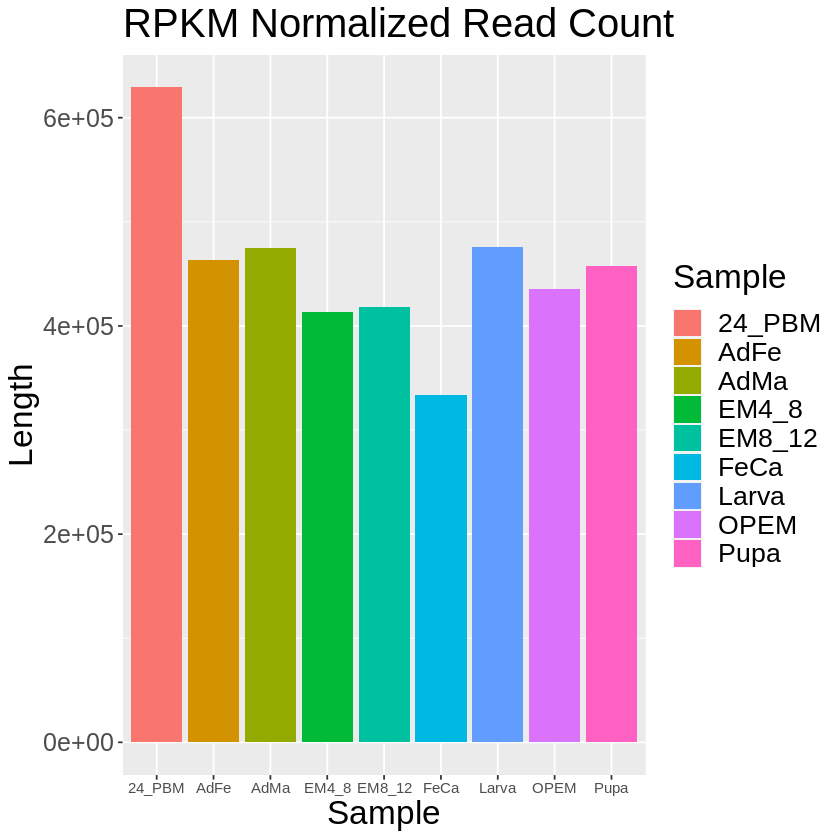

In [ ]:
#Normalisation of data with using rpkm due to single end reads 
# Taking gene lenghts as vector
geneLengths <- as.vector(subset(cdd, select = c(length)))

# compute RPKM
rpkm <- apply(subset(cdd, select = c(-length,-gene,-chr)),
              MARGIN = 2,
              FUN = function(x) 10^9 * x / geneLengths / sum(as.numeric(x)))
# Converting RPKM as dataframe
rpkm <- data.frame(rpkm)


# Changing colname of RPKM
#colnames(rpkm) <- c("EM0_1", "EM2_4", "EM4_8", "EM8_12", "Pupa", "Larva","AdFe", "AdMa", "24_PBM", "FeCa", "OPEM")
colnames(rpkm) <- c("EM4_8", "EM8_12", "Pupa", "Larva","AdFe", "AdMa", "24_PBM", "FeCa", "OPEM")
#Summary of RPKM
summary(rpkm)
rpkm$gene = cdd$gene
rpkm$func = gff$func
rpkm$chr = gff$chr
rpkm$start.pos = gff$start.pos
rpkm$end.pos = gff$end.pos
rpkm[grep("ID=ANSTEP-UCI_GENE_00006661",rpkm$gene),]
#finding the total read count after normalisation 
length1=nrow(rpkm)
col_sum = c()
for (i in 1:9)
  {
  col_sum<- c(col_sum,sum(rpkm[1:length1,i]))
  }

df <- data.frame(col_sum)
colnames(df)<-c("Length")
#df$Sample <- c("EM0_1", "EM2_4", "EM4_8", "EM8_12", "Pupa", "Larva","AdFe", "AdMa", "24_PBM", "FeCa", "OPEM")
df$Sample <- c("EM4_8", "EM8_12", "Pupa", "Larva","AdFe", "AdMa", "24_PBM", "FeCa", "OPEM")
df <- data.frame(df)
write.csv(rpkm,file="rpkm_developmentalstages.csv")
ggplot(data=df, aes(x=Sample, y=Length,fill=Sample)) +
  geom_bar(stat="identity")+
  ggtitle("RPKM Normalized Read Count")+theme(text = element_text(size = 20))+theme(axis.text.y = element_text(size = 15))+theme(axis.text.x = element_text(size = 9))


In [ ]:
#calulating the rowmean for different genes
rowmean=rowMeans(rpkm[,1:9])
rpkm[rpkm==0]<-1
rpkm[is.na(rpkm)]<-1
rpkm$Avg = rowmean
#calculation of log2fold with respected to simulated control
rpkm$log2_em4_8 = log2(rpkm$EM4_8/rpkm$Avg)
rpkm$log2_em8_12 = log2(rpkm$EM8_12/rpkm$Avg)
rpkm$log2_larva = log2(rpkm$Larva/rpkm$Avg)
rpkm$log2_pupa = log2(rpkm$Pupa/rpkm$Avg)
rpkm$log2_AdFe = log2(rpkm$AdFe/rpkm$Avg)
rpkm$log2_AdMa = log2(rpkm$AdMa/rpkm$Avg)
rpkm$log2_FeCa = log2(rpkm$FeCa/rpkm$Avg)
rpkm$log2_OPEM = log2(rpkm$OPEM/rpkm$Avg)
rpkm$log2_PBM = log2(rpkm$'24_PBM'/rpkm$Avg)

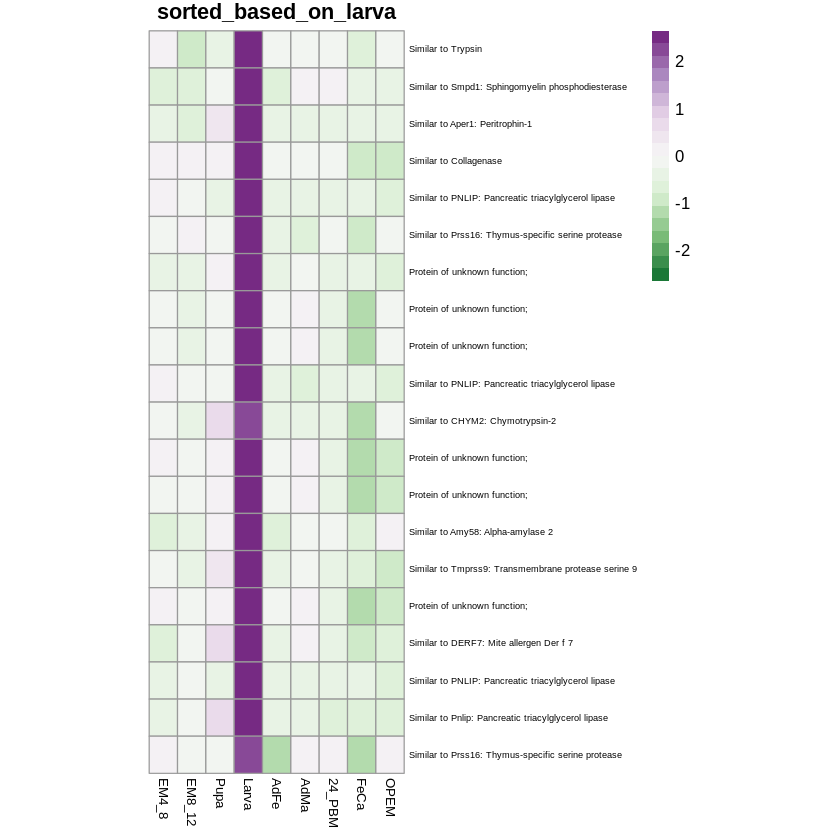

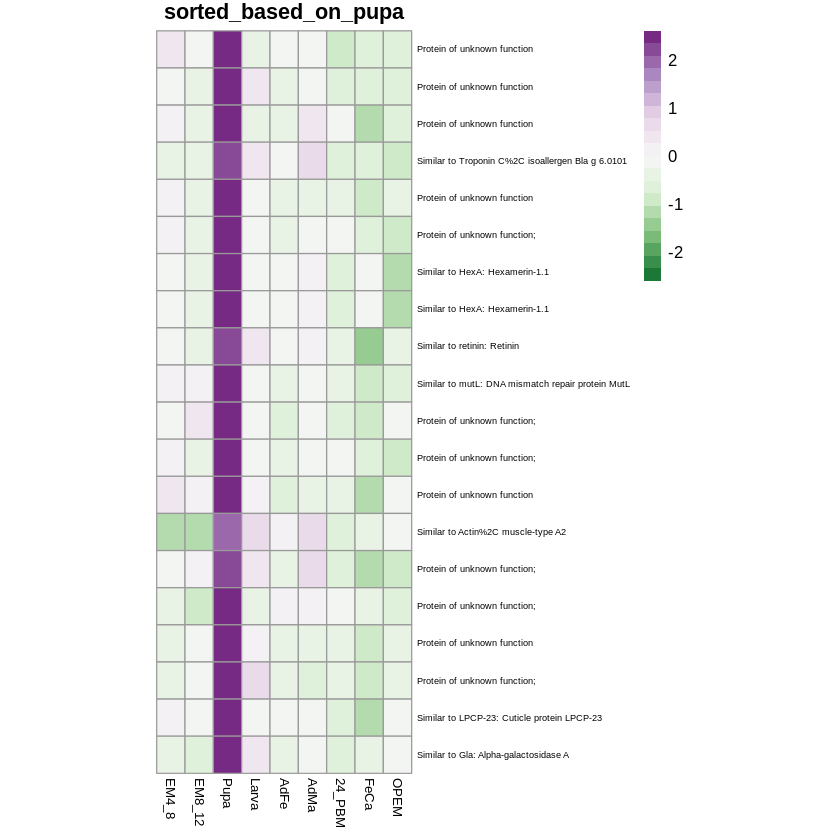

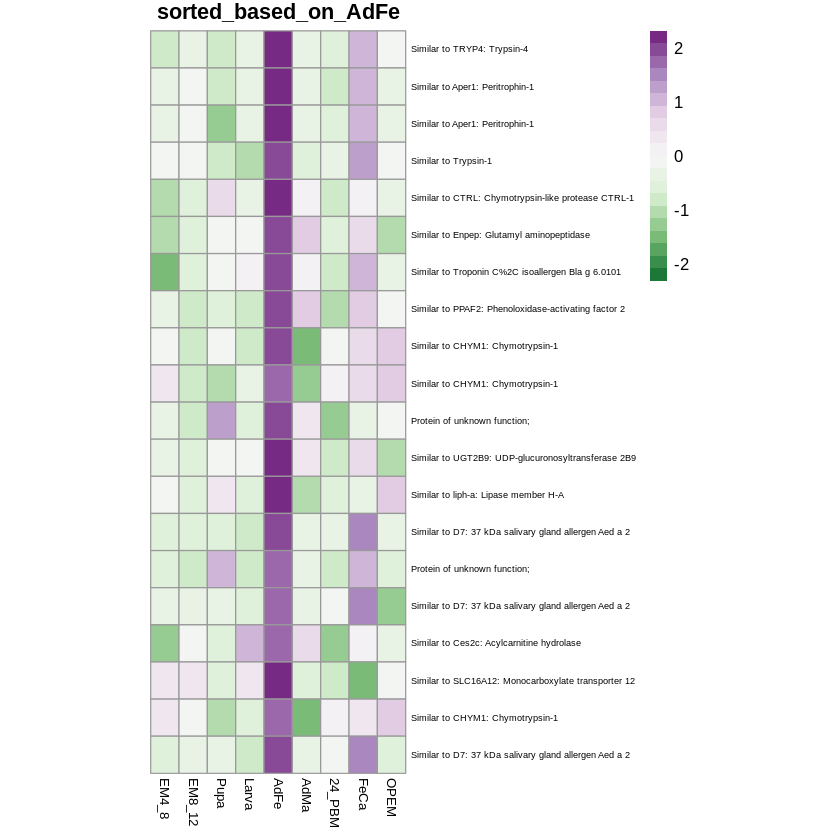

In [ ]:
#sorted descendingly based on Larva, pupa and adult female and selected top20
sorted_based_on_Larva_x_x = head(rpkm %>% dplyr::arrange(-log2_larva),20)
sorted_based_on_pupa_x_x = head(rpkm %>% dplyr::arrange(-log2_pupa),20)
sorted_based_on_AdFe_x_x = head(rpkm %>% dplyr::arrange(-log2_AdFe),20)
pheatmap(log2(sorted_based_on_Larva_x_x[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_Larva_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_larva",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2(sorted_based_on_pupa_x_x[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_pupa_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_pupa",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2(sorted_based_on_AdFe_x_x[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_AdFe_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_AdFe",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
write.csv(sorted_based_on_Larva_x_x,file="sorted_based_on_Larva_x_x")



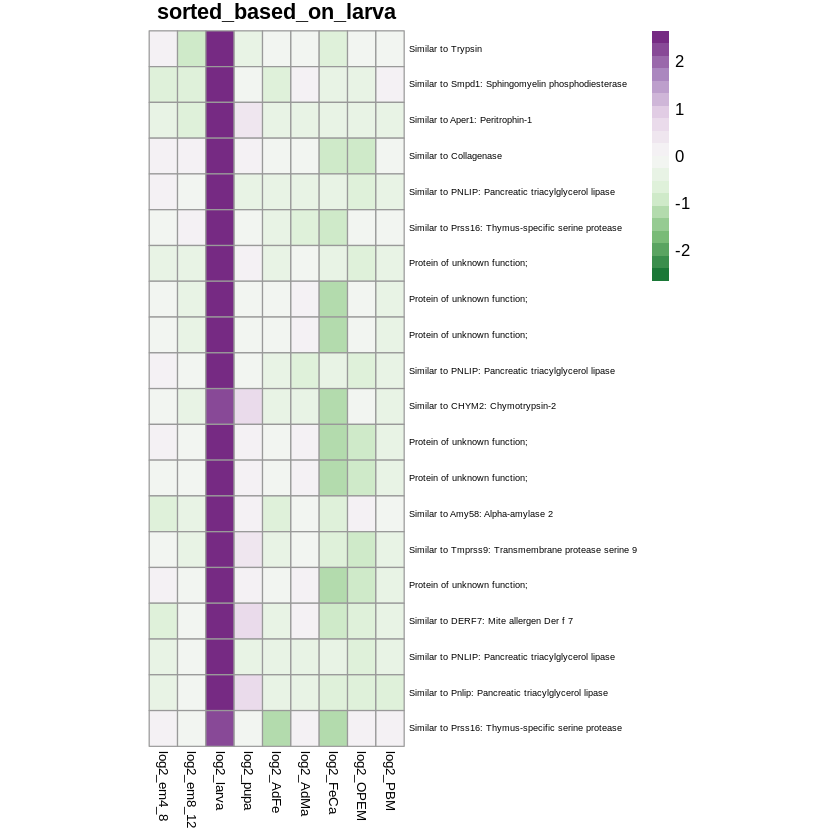

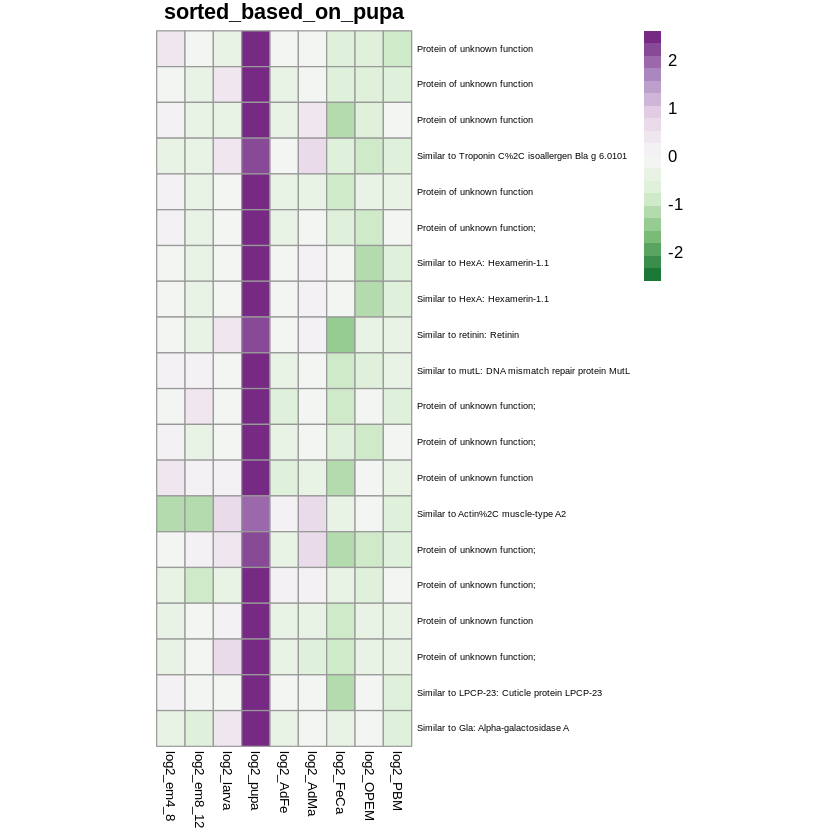

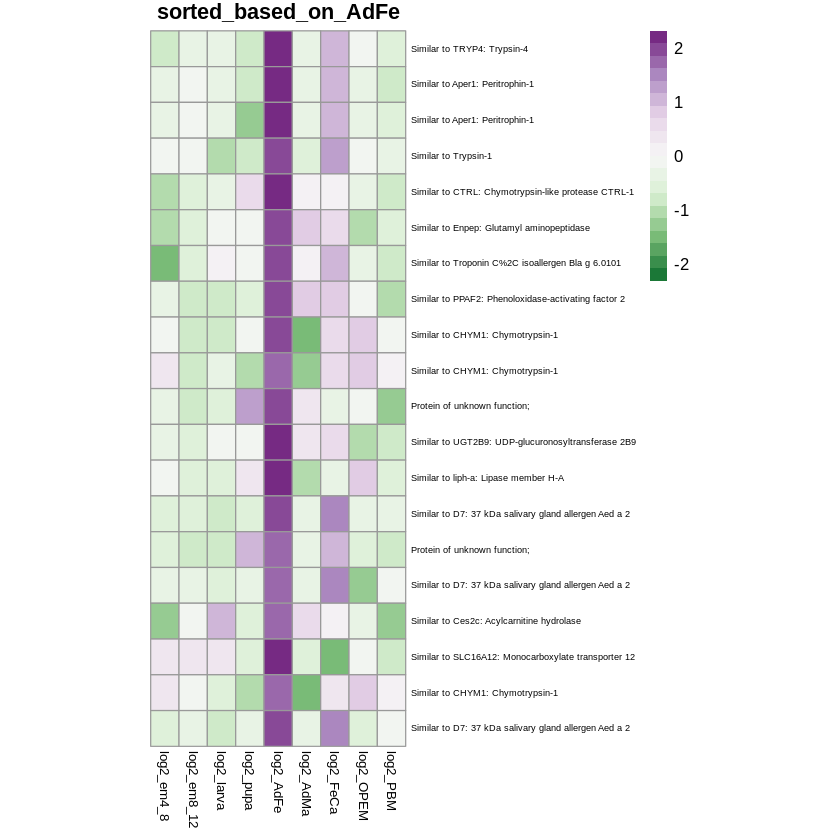

In [ ]:
#heatmap using log2fold 
pheatmap(sorted_based_on_Larva_x_x[,16:24],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_Larva_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_larva",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(sorted_based_on_pupa_x_x[,16:24],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_pupa_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_pupa",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(sorted_based_on_AdFe_x_x[,16:24],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_AdFe_x_x$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_AdFe",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))

func,variable,value
<chr>,<fct>,<dbl>
Similar to GILT3: GILT-like protein 3,EM4_8,0.6673176
Similar to GILT3: GILT-like protein 3,EM8_12,1.7514016
Similar to GILT3: GILT-like protein 3,Pupa,7.8596867
Similar to GILT3: GILT-like protein 3,Larva,1.3798717
Similar to GILT3: GILT-like protein 3,AdFe,3.2892942
Similar to GILT3: GILT-like protein 3,AdMa,1.3101435
Similar to GILT3: GILT-like protein 3,24_PBM,0.3526783
Similar to GILT3: GILT-like protein 3,FeCa,0.4115511
Similar to GILT3: GILT-like protein 3,OPEM,0.5020120


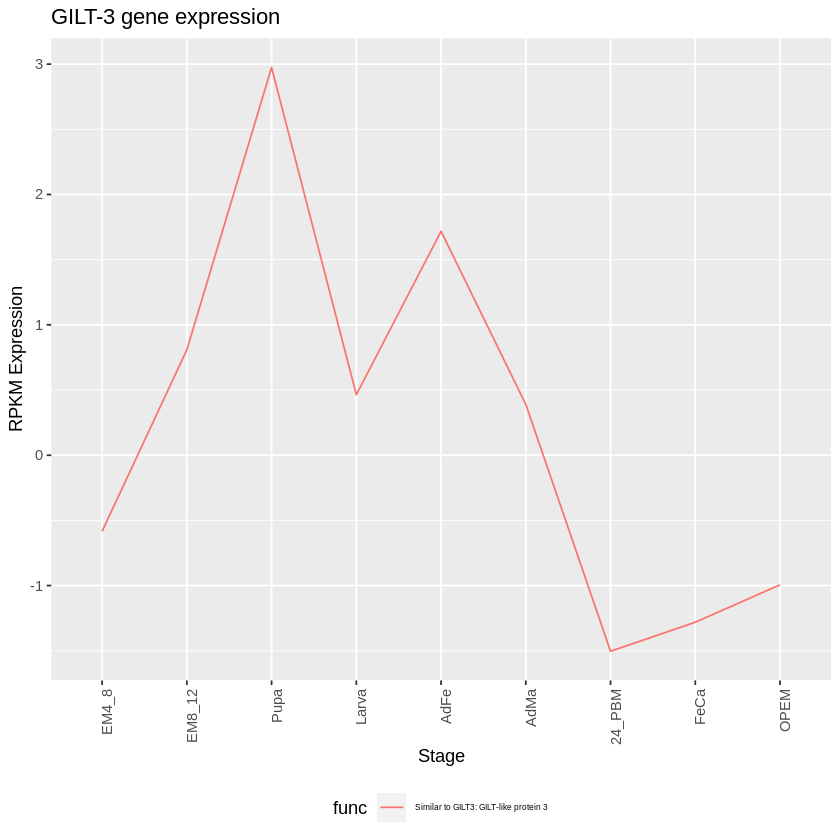

In [ ]:
#gilt gene expression a lineplot using rpkm expression
gilt_exp = rpkm[grep("ID=ANSTEP-UCI_GENE_00004488",rpkm$gene),]
s_p = gilt_exp[,1:9]
s_p$func = gilt_exp$func
melted <- melt(s_p, id.vars = "func")
melted
ggplot(melted, aes(x = variable, y = log2(value), colour = func, group=func)) + geom_line()+
  ggtitle("GILT-3 gene expression")+
  labs(y="RPKM Expression", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

,log2_em4_8,log2_em8_12,log2_larva,log2_pupa,log2_AdFe,log2_AdMa,log2_FeCa,log2_OPEM,log2_PBM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11817,-1.544886,-0.1528217,-0.4967975,2.01314,0.7564464,-0.5716068,-2.242188,-1.955538,-2.464907


func,variable,value
<chr>,<fct>,<dbl>
Similar to GILT3: GILT-like protein 3,log2_em4_8,-1.5448863
Similar to GILT3: GILT-like protein 3,log2_em8_12,-0.1528217
Similar to GILT3: GILT-like protein 3,log2_larva,-0.4967975
Similar to GILT3: GILT-like protein 3,log2_pupa,2.0131402
Similar to GILT3: GILT-like protein 3,log2_AdFe,0.7564464
Similar to GILT3: GILT-like protein 3,log2_AdMa,-0.5716068
Similar to GILT3: GILT-like protein 3,log2_FeCa,-2.2421882
Similar to GILT3: GILT-like protein 3,log2_OPEM,-1.9555380
Similar to GILT3: GILT-like protein 3,log2_PBM,-2.4649069


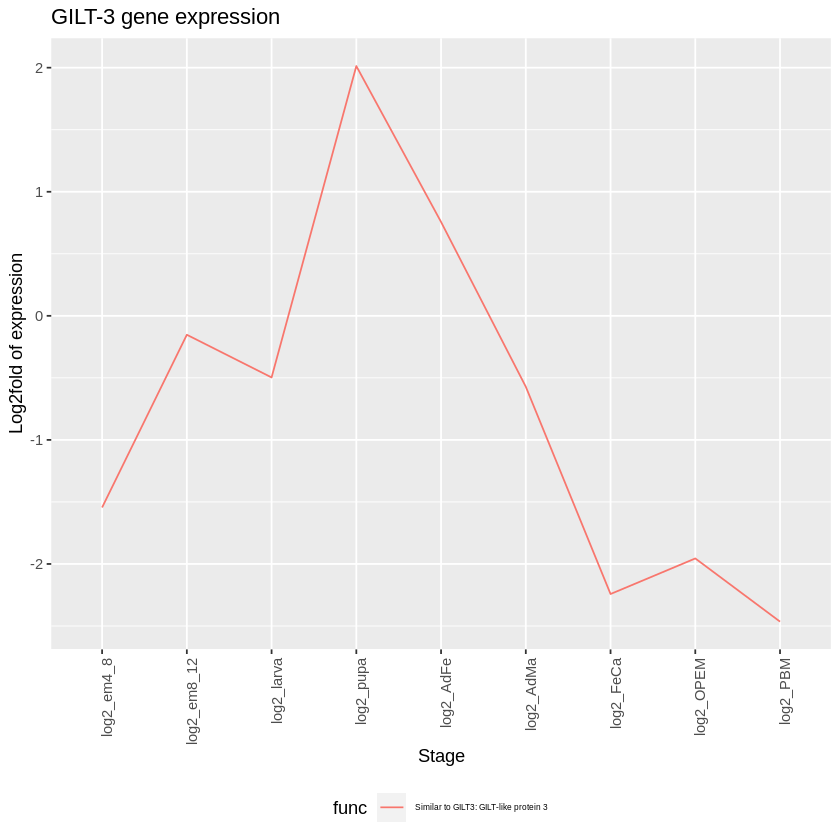

In [ ]:
#gilt gene expression a lineplot using log2fold change
gilt_exp = rpkm[grep("ID=ANSTEP-UCI_GENE_00004488",rpkm$gene),]
gilt_exp[,16:24]
log_val_exp = gilt_exp[,16:24]
log_val_exp$func = gilt_exp$func
melted <- melt(log_val_exp, id.vars = "func")
melted
ggplot(melted, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("GILT-3 gene expression")+
  labs(y="Log2fold of expression", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

n
<int>
6446


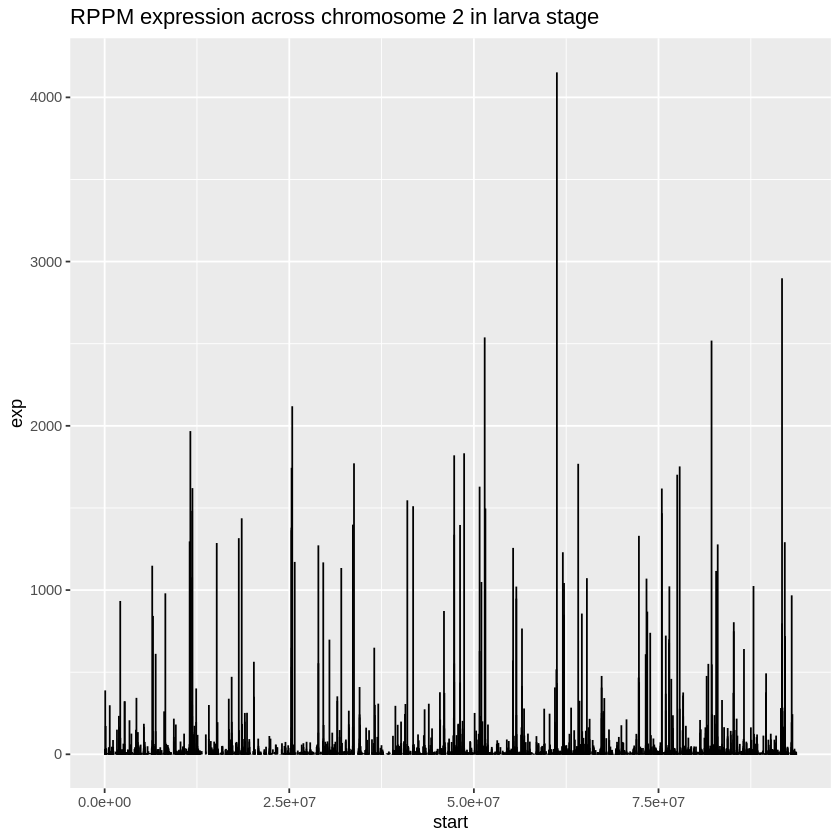

In [ ]:
#expression pattern in Larva across chromosome 2 with rpkm expression value
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
Larva_exp_rpkm= as.vector(all_genes_of_chromosome2$Larva)
Larva_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
p_larva = data.frame(Larva_exp_rpkm,Larva_start_pos)
colnames(p_larva)= c("exp","start")
count(p_larva)
ggplot(data=p_larva, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPPM expression across chromosome 2 in larva stage")



n
<int>
6446


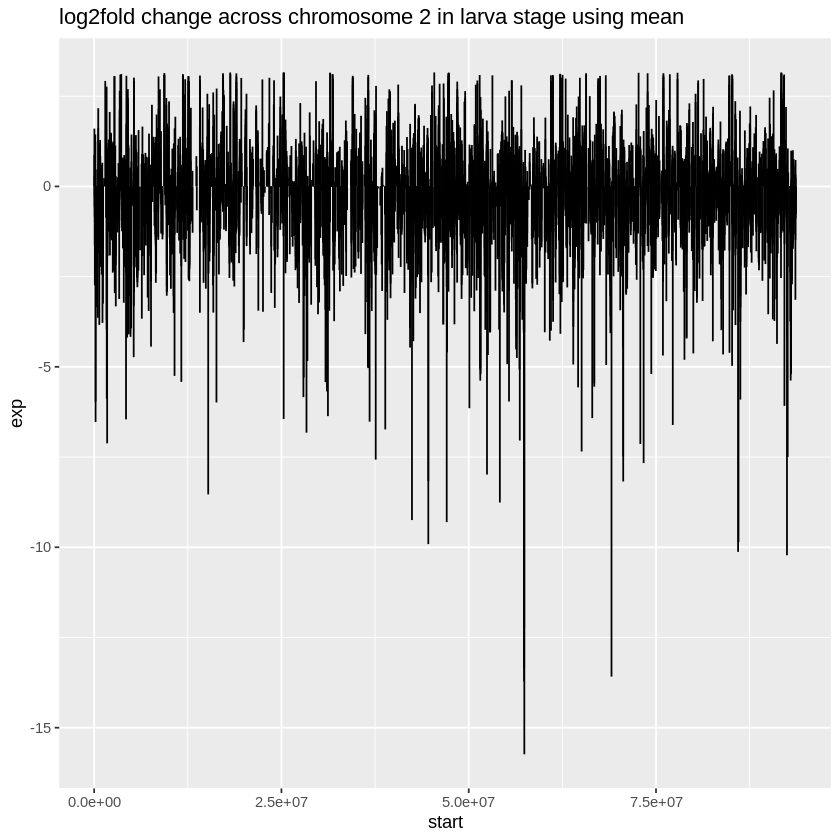

In [ ]:
#expression pattern in Larva across chromosome 2 with log2foldchange expression
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
foldchange_Larva_exp_rpkm= as.vector(all_genes_of_chromosome2$log2_larva)
foldchange_Larva_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
log2_larva = data.frame(foldchange_Larva_exp_rpkm,foldchange_Larva_start_pos)
colnames(log2_larva)= c("exp","start")
count(log2_larva)
ggplot(data=log2_larva, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("log2fold change across chromosome 2 in larva stage using mean")


n
<int>
6446


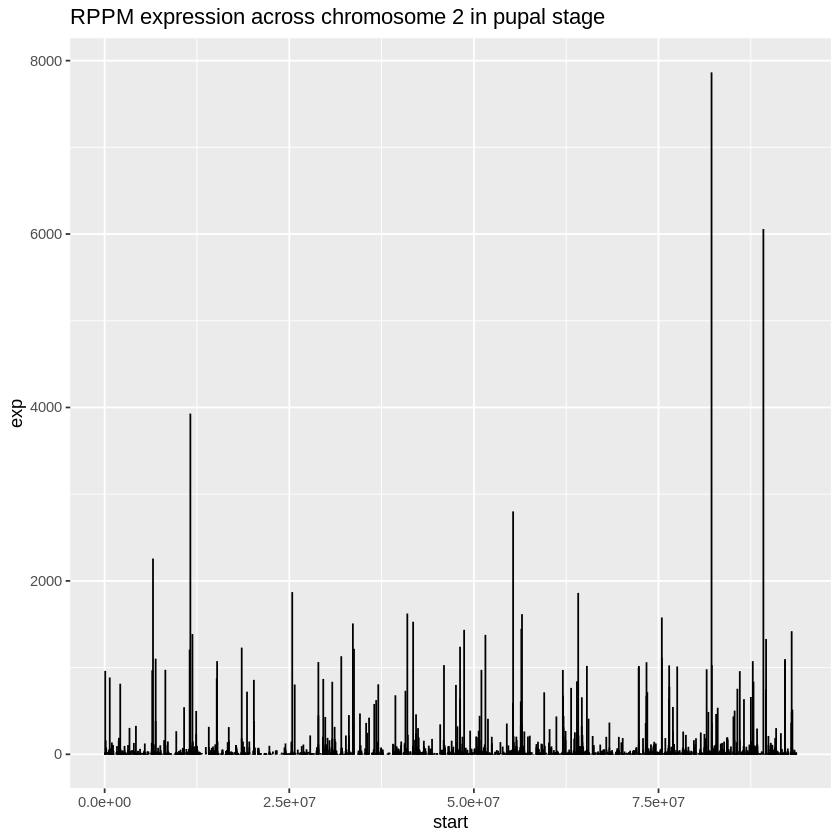

In [ ]:
#rpkm expression pattern in Pupa across chromosome 2
rpkm_exp_pupa= as.vector(all_genes_of_chromosome2$Pupa)
start_pos_pupa = as.vector(all_genes_of_chromosome2$start.pos)
rpkm_pupa = data.frame(rpkm_exp_pupa,start_pos_pupa)
colnames(rpkm_pupa)= c("exp","start")
count(rpkm_pupa)
ggplot(data=p_pupa, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPPM expression across chromosome 2 in pupal stage")

n
<int>
6446


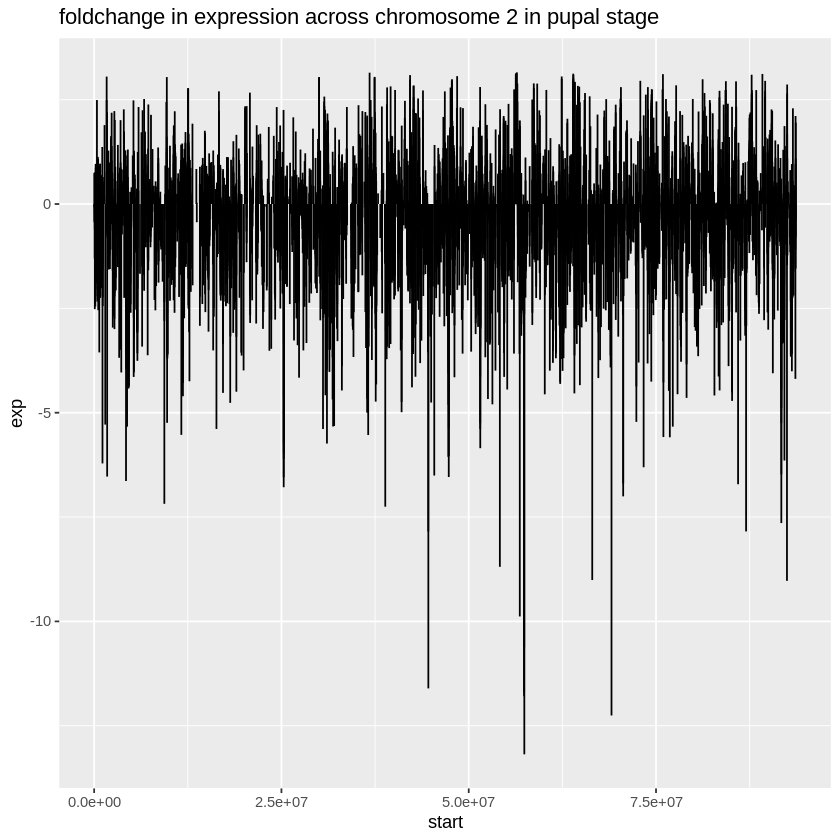

In [ ]:
#foldchange in expression pattern in Pupa across chromosome 2
log2_rpkm_exp_pupa= as.vector(all_genes_of_chromosome2$log2_pupa)
log2_start_pos_pupa = as.vector(all_genes_of_chromosome2$start.pos)
log2_pupa = data.frame(log2_rpkm_exp_pupa,log2_start_pos_pupa)
colnames(log2_pupa)= c("exp","start")
count(log2_pupa)
ggplot(data=log2_pupa, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("foldchange in expression across chromosome 2 in pupal stage")


n
<int>
6446


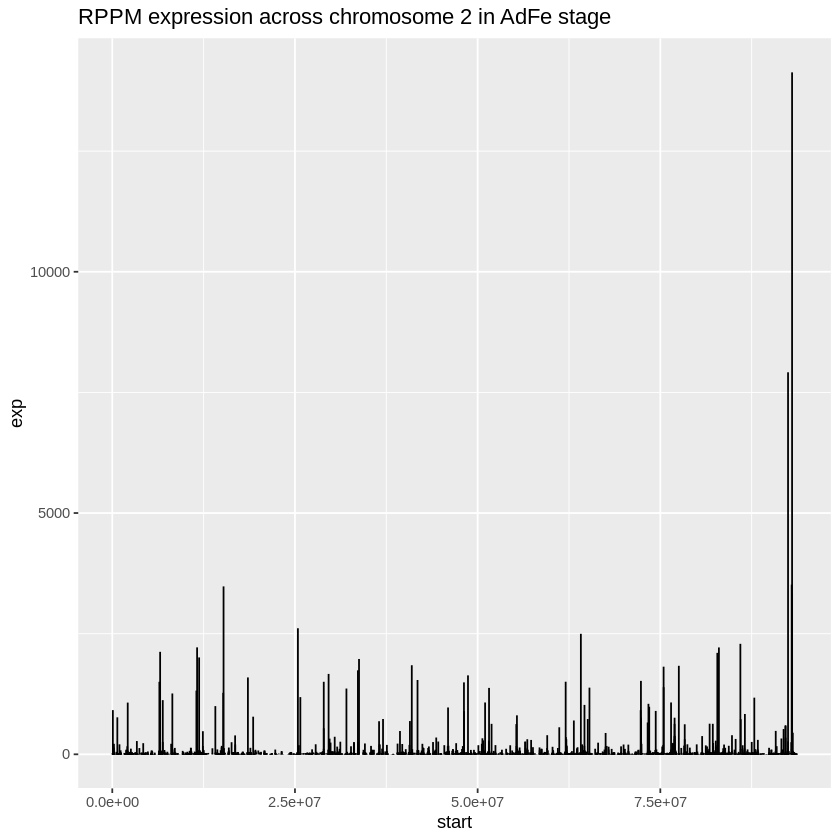

In [ ]:
#rpkm expression pattern in AdFe across chromosome 2
RPKM_exp_AdFe= as.vector(p_k$AdFe)
start_pos_AdFe= as.vector(p_k$start.pos)
RPKM_AdFe = data.frame(RPKM_exp_AdFe,start_pos_AdFe)
colnames(RPKM_AdFe)= c("exp","start")
count(RPKM_AdFe)
ggplot(data=RPKM_AdFe, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPPM expression across chromosome 2 in AdFe stage")

n
<int>
6446


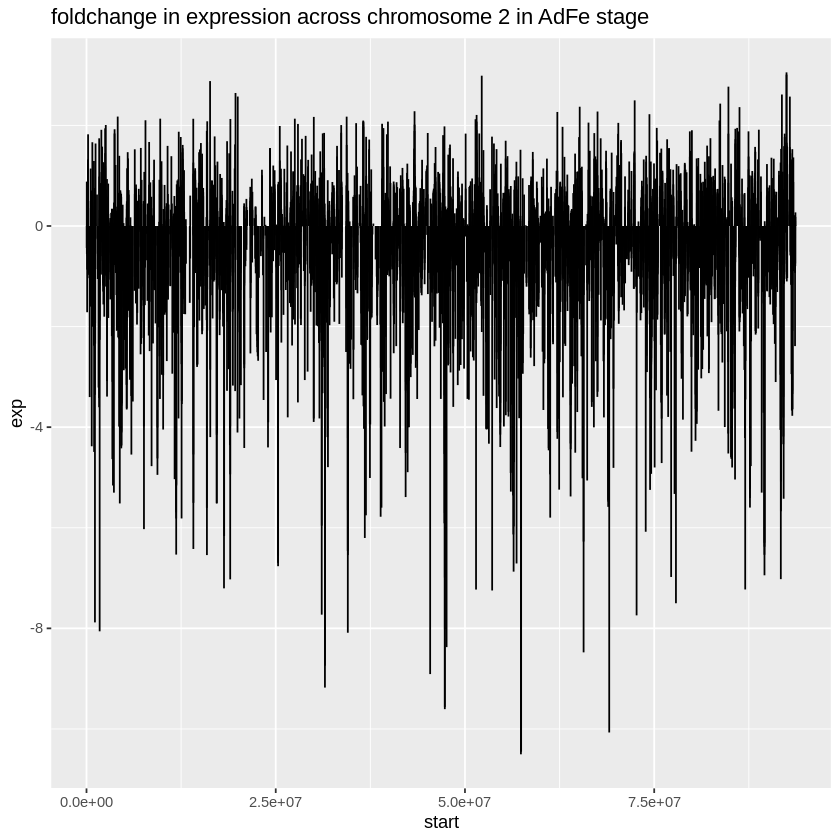

In [ ]:
#log2fold in expression pattern in AdFe across chromosome 2
log2_RPKM_exp_AdFe= as.vector(all_genes_of_chromosome2$log2_AdFe)
log2_start_pos_AdFe= as.vector(all_genes_of_chromosome2$start.pos)
log2_RPKM_AdFe = data.frame(log2_RPKM_exp_AdFe,log2_start_pos_AdFe)
colnames(log2_RPKM_AdFe)= c("exp","start")
count(log2_RPKM_AdFe)
ggplot(data=log2_RPKM_AdFe, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("foldchange in expression across chromosome 2 in AdFe stage")

In [ ]:
#using median of the control
rpkm[rpkm==0]<-1
rpkm[is.na(rpkm)]<-1
rpkm$Median = apply(rpkm[,1:9],1,median)
#calculation of log2fold with respected to simulated control
rpkm$log2_em4_8_median = log2(rpkm$EM4_8/rpkm$Median)
rpkm$log2_em8_12_median = log2(rpkm$EM8_12/rpkm$Median)
rpkm$log2_larva_median = log2(rpkm$Larva/rpkm$Median)
rpkm$log2_pupa_median = log2(rpkm$Pupa/rpkm$Median)
rpkm$log2_AdFe_median = log2(rpkm$AdFe/rpkm$Median)
rpkm$log2_AdMa_median = log2(rpkm$AdMa/rpkm$Median)
rpkm$log2_FeCa_median = log2(rpkm$FeCa/rpkm$Median)
rpkm$log2_OPEM_median = log2(rpkm$OPEM/rpkm$Median)
rpkm$log2_PBM_median = log2(rpkm$'24_PBM'/rpkm$Median)

n
<int>
6446


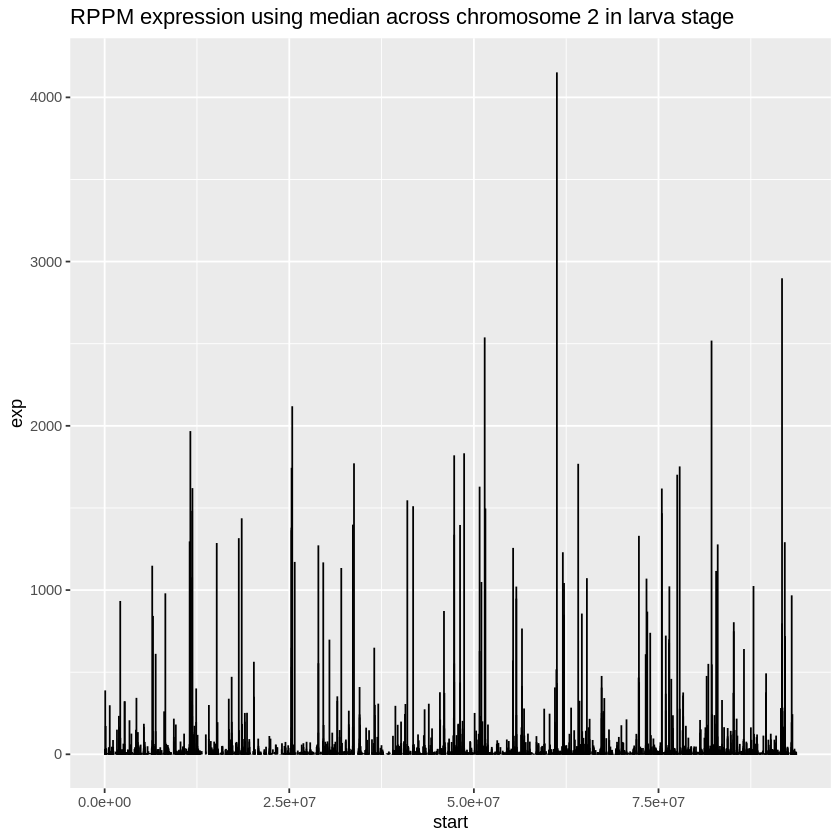

In [ ]:
#expression pattern in Larva across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
median_Larva_exp_rpkm= as.vector(all_genes_of_chromosome2$Larva)
median_Larva_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
median_larva = data.frame(median_Larva_exp_rpkm,median_Larva_start_pos)
colnames(median_larva)= c("exp","start")
count(median_larva)
ggplot(data=median_larva, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPPM expression using median across chromosome 2 in larva stage")

n
<int>
6446


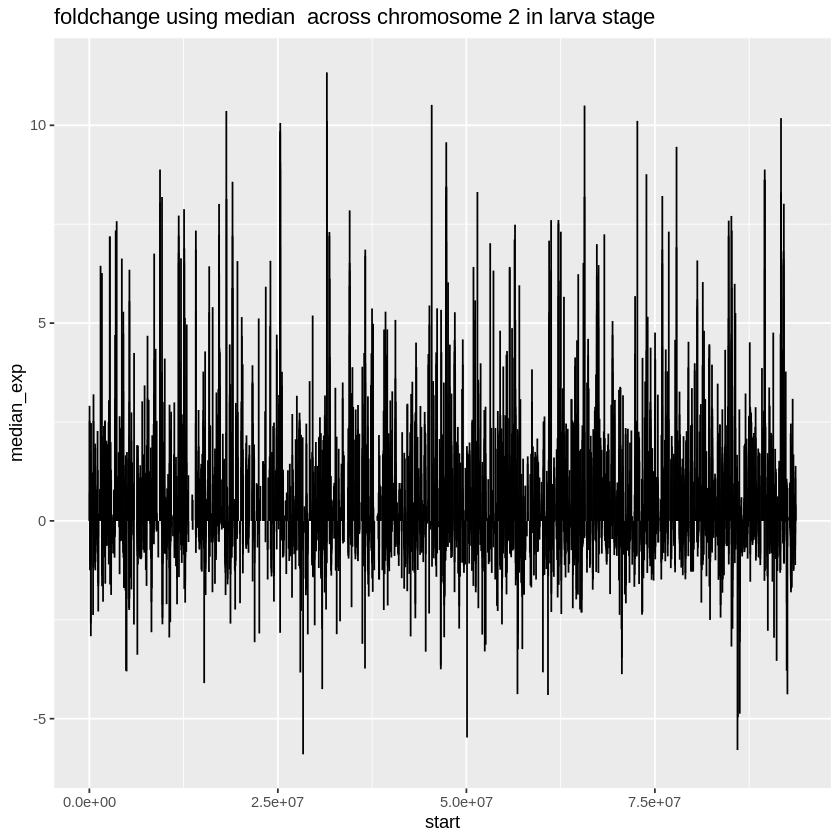

In [ ]:
#expression pattern in Larva across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
log2_median_Larva_exp_rpkm= as.vector(all_genes_of_chromosome2$log2_larva_median)
log2_median_Larva_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
log2_median_larva = data.frame(log2_median_Larva_exp_rpkm,log2_median_Larva_start_pos)
colnames(log2_median_larva)= c("median_exp","start")
count(log2_median_larva)
ggplot(data=log2_median_larva, aes(x=start, y=median_exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("foldchange using median  across chromosome 2 in larva stage")


n
<int>
6446


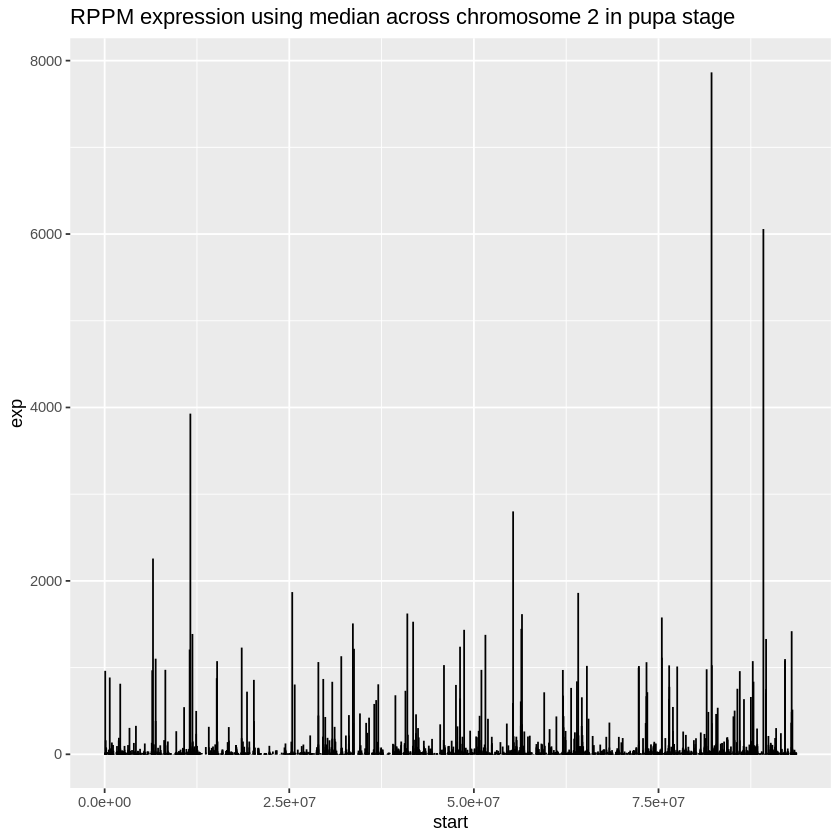

In [ ]:
#expression pattern in pupa across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
median_pupa_exp_rpkm= as.vector(all_genes_of_chromosome2$Pupa)
median_pupa_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
median_pupa = data.frame(median_pupa_exp_rpkm,median_pupa_start_pos)
colnames(median_pupa)= c("exp","start")
count(median_pupa)
ggplot(data=median_pupa, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPPM expression using median across chromosome 2 in pupa stage")

n
<int>
6446


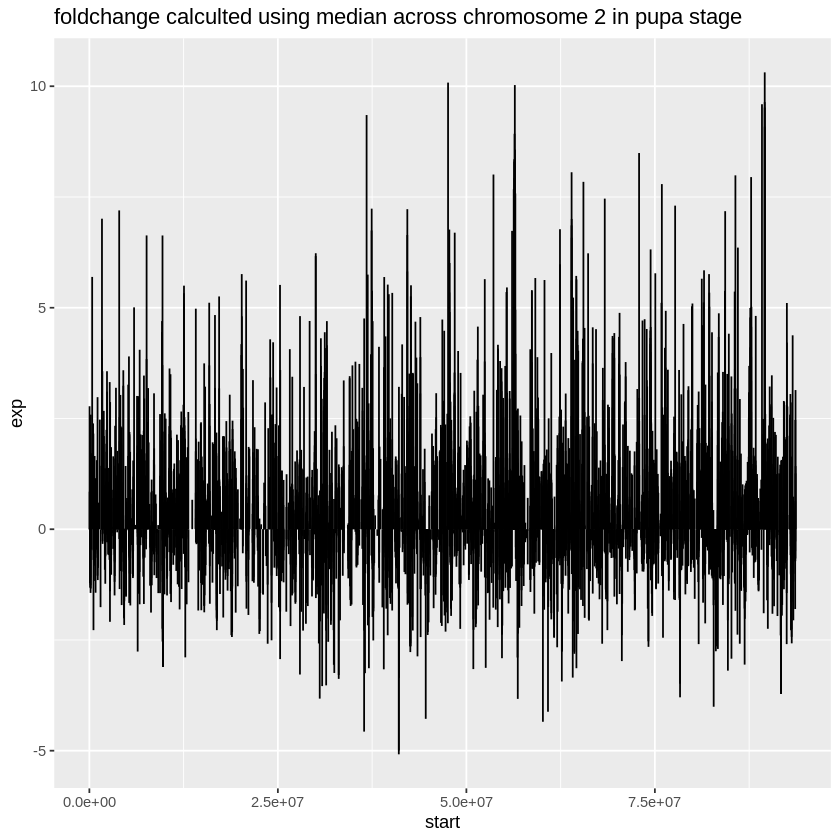

In [ ]:
#expression pattern in pupa across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
log2_median_pupa_exp_rpkm= as.vector(all_genes_of_chromosome2$log2_pupa_median)
log2_median_pupa_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
log2_median_pupa = data.frame(log2_median_pupa_exp_rpkm,log2_median_pupa_start_pos)
colnames(log2_median_pupa)= c("exp","start")
count(log2_median_pupa)
ggplot(data=log2_median_pupa, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("foldchange calculted using median across chromosome 2 in pupa stage")

n
<int>
6446


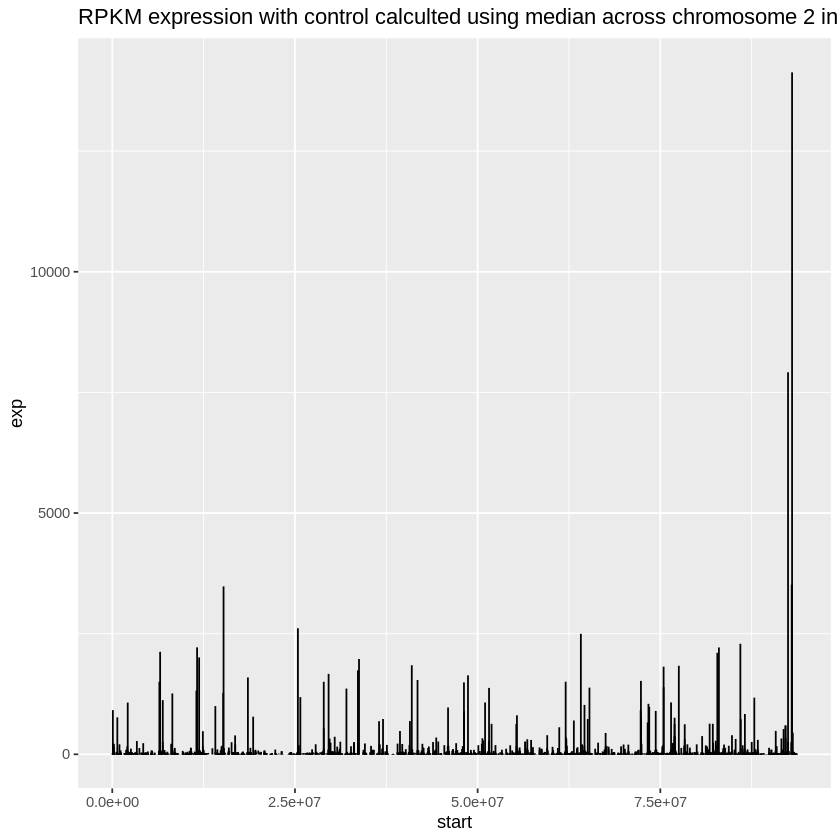

In [ ]:
#expression pattern in AdFe across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
median_AdFe_exp_rpkm= as.vector(all_genes_of_chromosome2$AdFe)
median_AdFe_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
median_AdFe = data.frame(median_AdFe_exp_rpkm,median_AdFe_start_pos)
colnames(median_AdFe)= c("exp","start")
count(median_AdFe)
ggplot(data=median_AdFe, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("RPKM expression with control calculted using median across chromosome 2 in AdFe stage")

n
<int>
6446


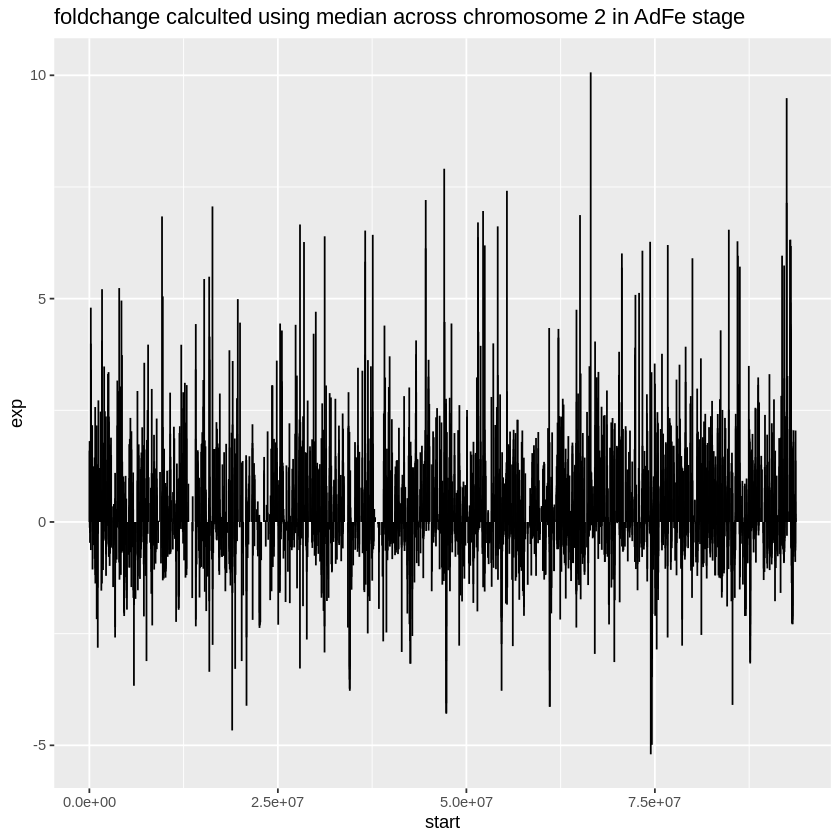

In [ ]:
#expression pattern in AdFe across chromosome 2 with rpkm expression value after calculating median accross row
all_genes_of_chromosome2=rpkm[grep("chr2",rpkm$chr),]
write.csv(all_genes_of_chromosome2,file="p_k.csv")
log2_median_AdFe_exp_rpkm= as.vector(all_genes_of_chromosome2$log2_AdFe_median)
log2_median_AdFe_start_pos= as.vector(all_genes_of_chromosome2$start.pos)
log2_median_AdFe = data.frame(log2_median_AdFe_exp_rpkm,log2_median_AdFe_start_pos)
colnames(log2_median_AdFe)= c("exp","start")
count(log2_median_AdFe)
ggplot(data=log2_median_AdFe, aes(x=start, y=exp)) +
  geom_bar(stat = "identity", width = 0.1, color = "black") +
  ggtitle("foldchange calculted using median across chromosome 2 in AdFe stage")

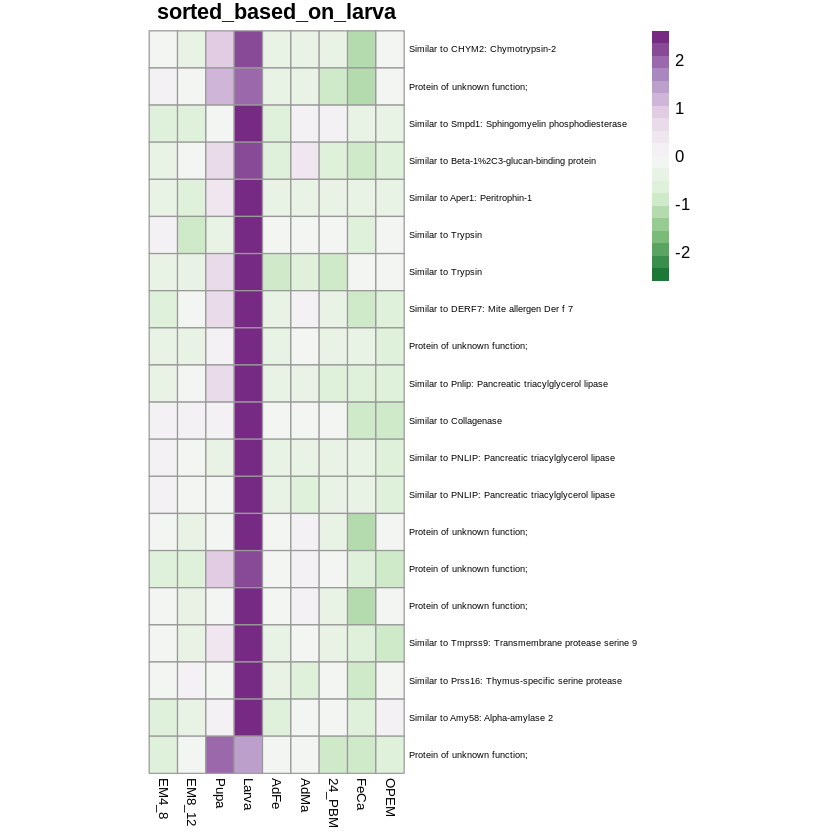

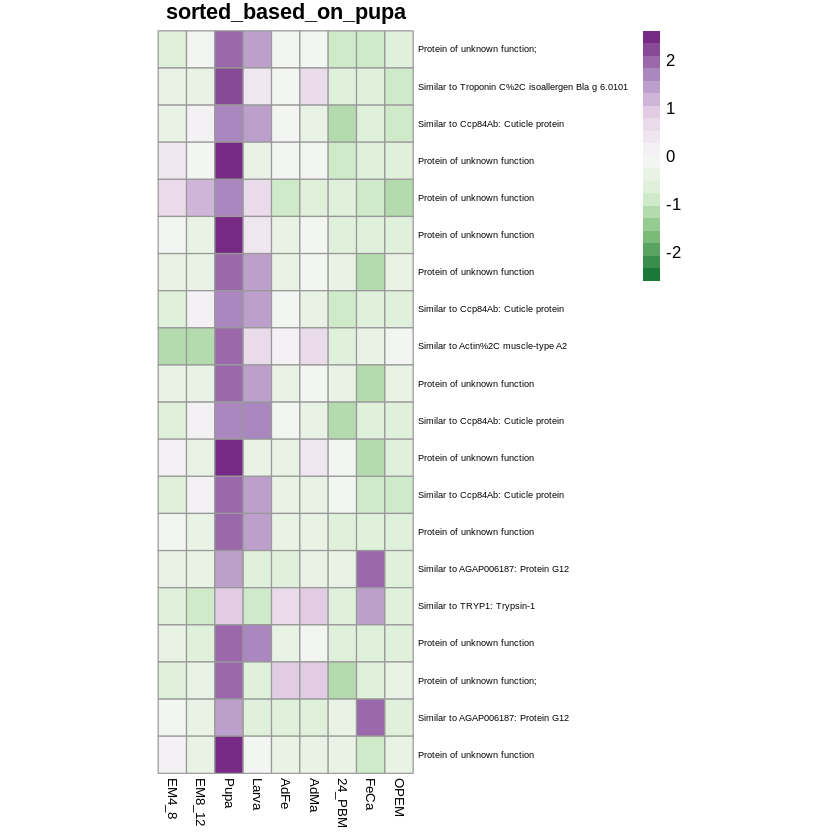

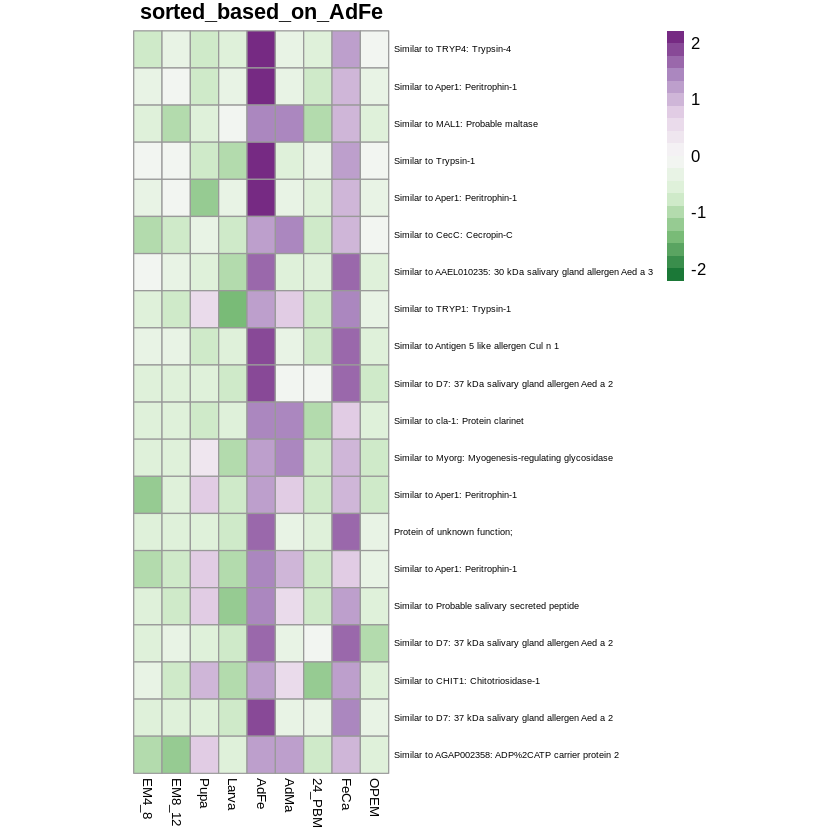

In [ ]:
#sorted descendingly based on Larva, pupa and adult female and selected top20 after using median value across the row as control
sorted_based_on_Larva_median = head(rpkm %>% dplyr::arrange(-log2_larva_median),20)
sorted_based_on_pupa_median = head(rpkm %>% dplyr::arrange(-log2_pupa_median),20)
sorted_based_on_AdFe_median = head(rpkm %>% dplyr::arrange(-log2_AdFe_median),20)
pheatmap(log2(sorted_based_on_Larva_median[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_Larva_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_larva",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2(sorted_based_on_pupa_median[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_pupa_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_pupa",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2(sorted_based_on_AdFe_median[,1:9]),scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(sorted_based_on_AdFe_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_AdFe",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
write.csv(sorted_based_on_Larva_median,file="sorted_based_on_Larva_median")



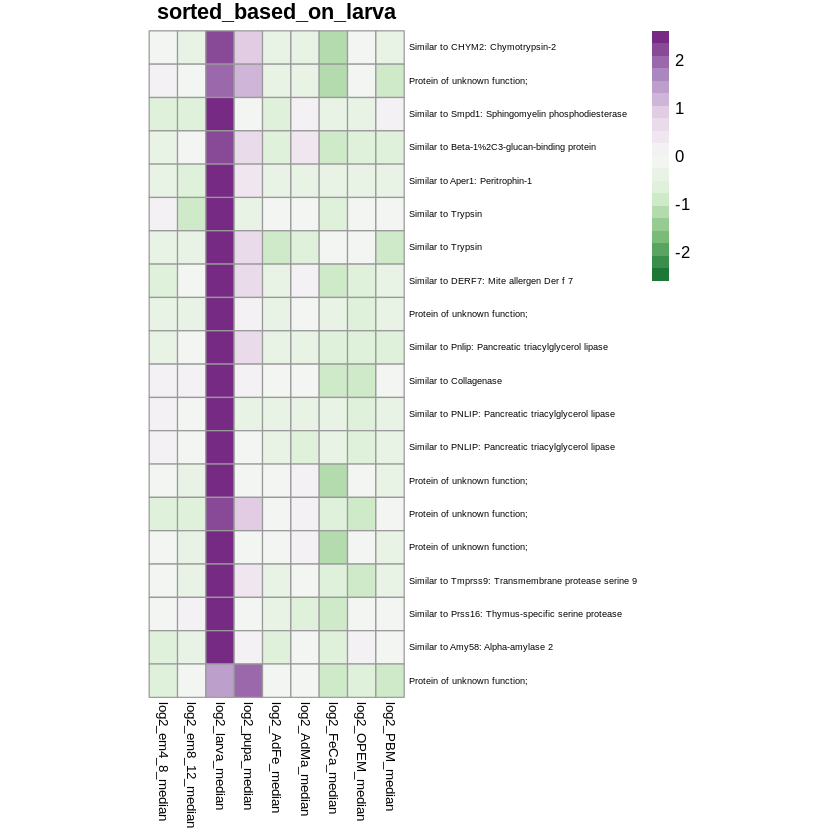

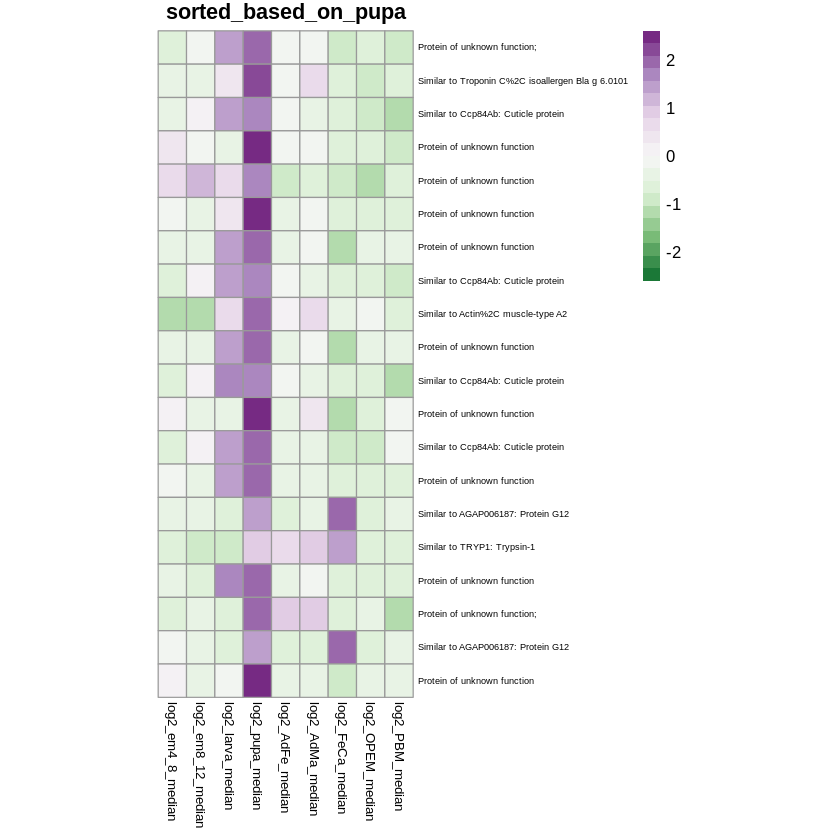

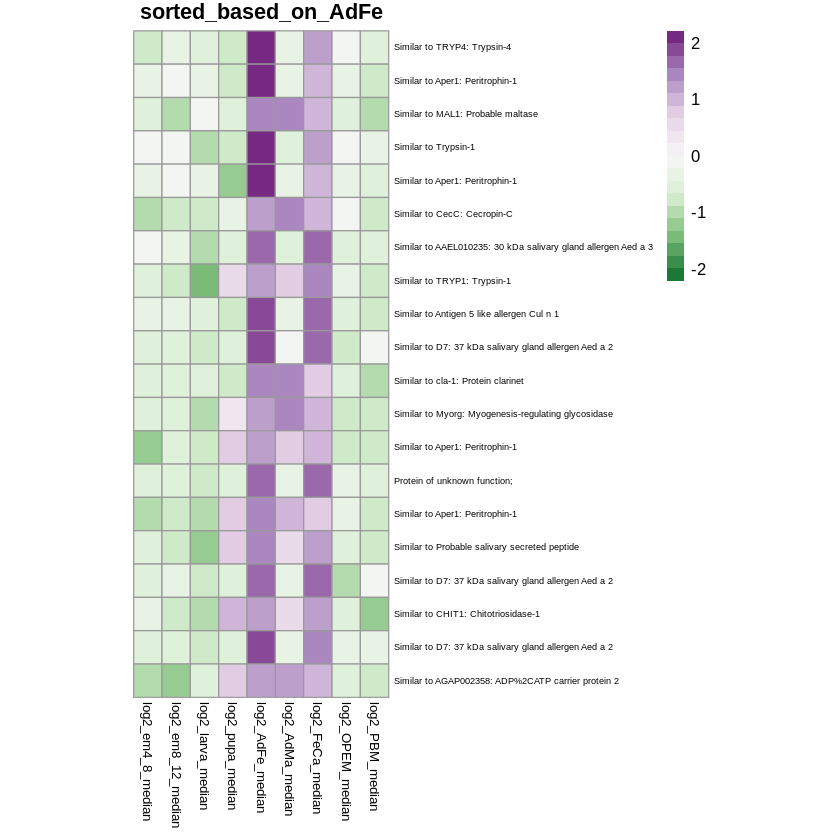

In [ ]:
#sorted descendingly based on Larva, pupa and adult female and selected top20 after using median value across the row as control
log2_sorted_based_on_Larva_median = head(rpkm %>% dplyr::arrange(-log2_larva_median),20)
log2_sorted_based_on_pupa_median = head(rpkm %>% dplyr::arrange(-log2_pupa_median),20)
log2_sorted_based_on_AdFe_median = head(rpkm %>% dplyr::arrange(-log2_AdFe_median),20)
pheatmap(log2_sorted_based_on_Larva_median[,26:34],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(log2_sorted_based_on_Larva_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_larva",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2_sorted_based_on_pupa_median[,26:34],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(log2_sorted_based_on_pupa_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_pupa",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(log2_sorted_based_on_AdFe_median[,26:34],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(log2_sorted_based_on_AdFe_median$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="sorted_based_on_AdFe",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
write.csv(sorted_based_on_Larva_median,file="sorted_based_on_Larva_median")


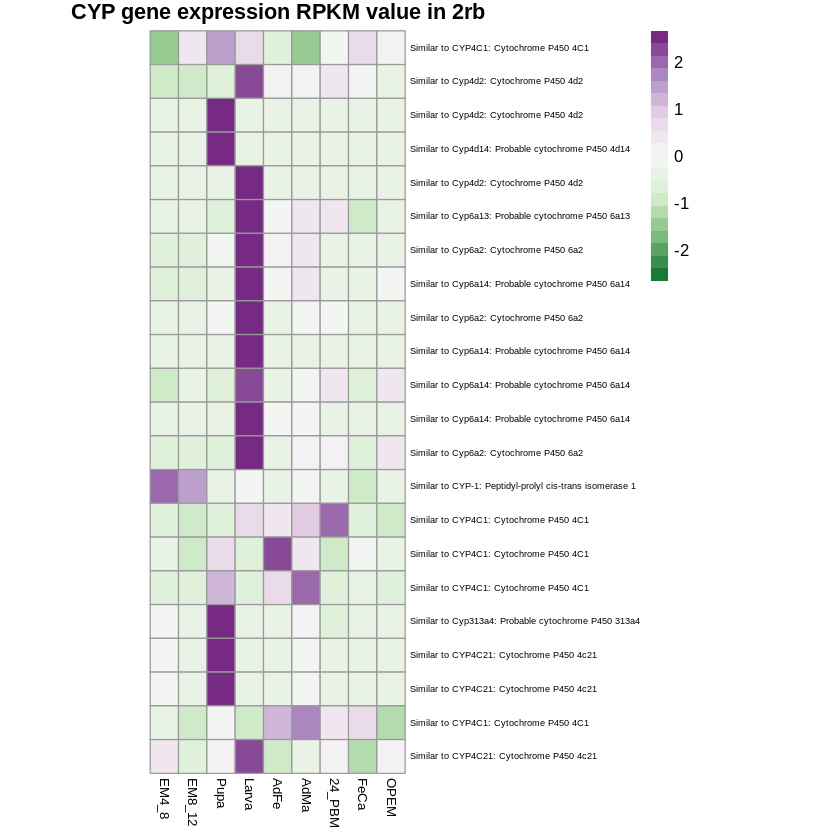

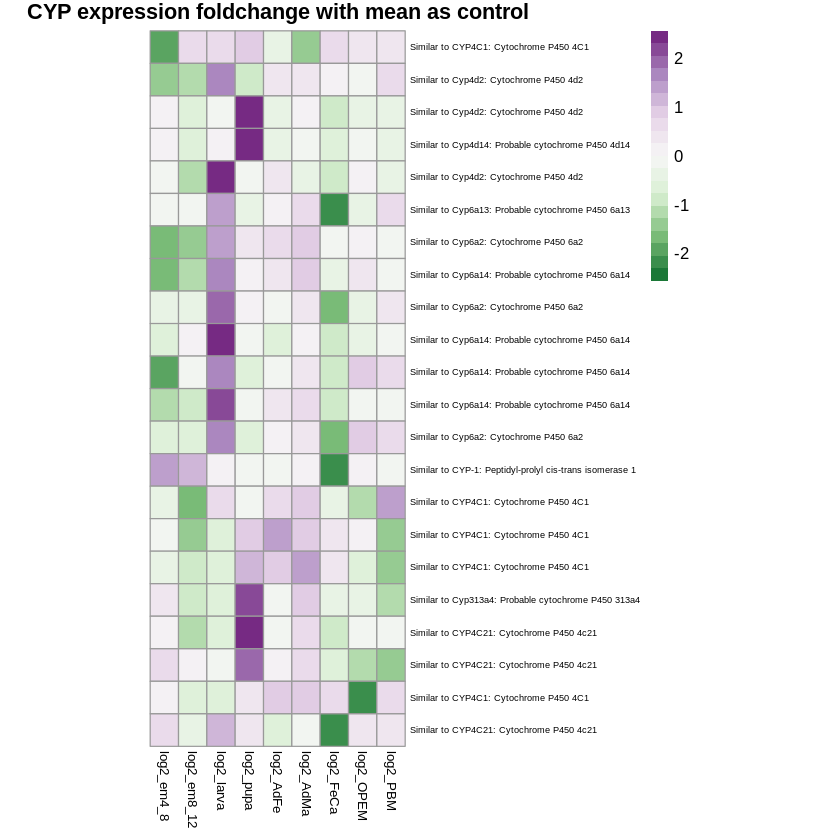

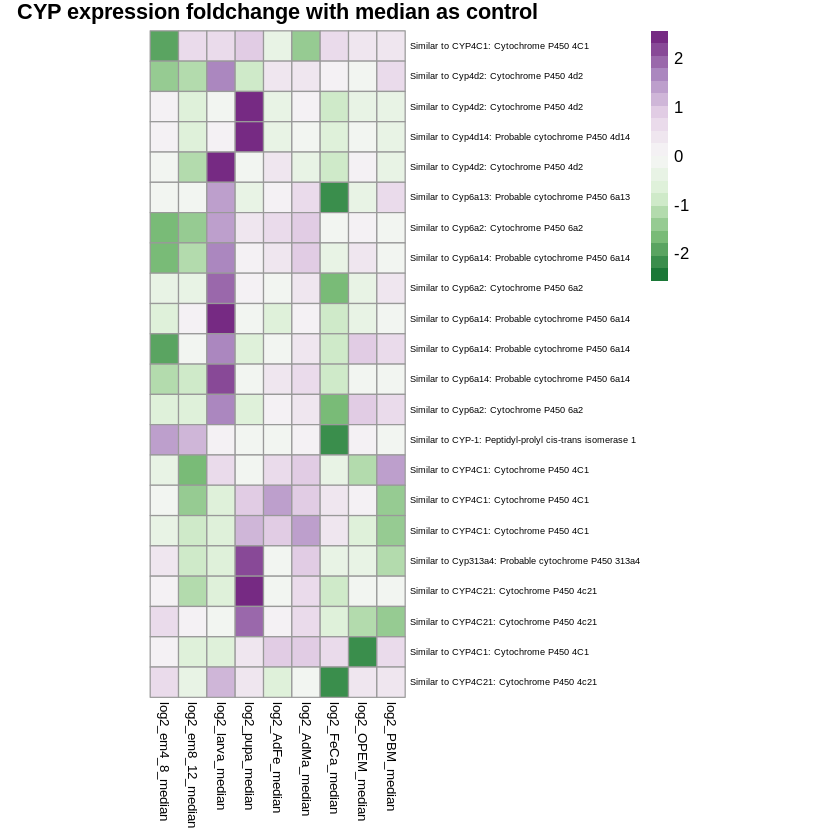

In [ ]:
#CYP gene expression in 2rb after taking median as control
only_2rb = as.data.frame(subset(all_genes_of_chromosome2,start.pos>55000000 & start.pos<71000000))
cyps=only_2rb[grep("CYP",only_2rb$func ,ignore.case = T),]
pheatmap(cyps[,1:9],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(cyps$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="CYP gene expression RPKM value in 2rb",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))

pheatmap(cyps[,16:24],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(cyps$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="CYP expression foldchange with mean as control",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(cyps[,26:34],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(cyps$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="CYP expression foldchange with median as control",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))


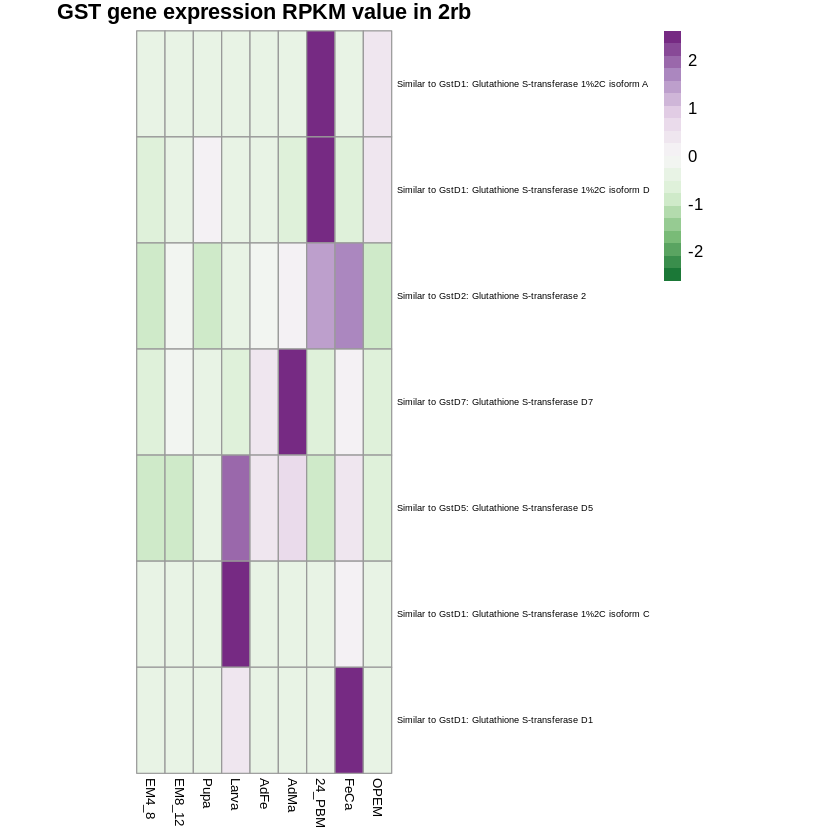

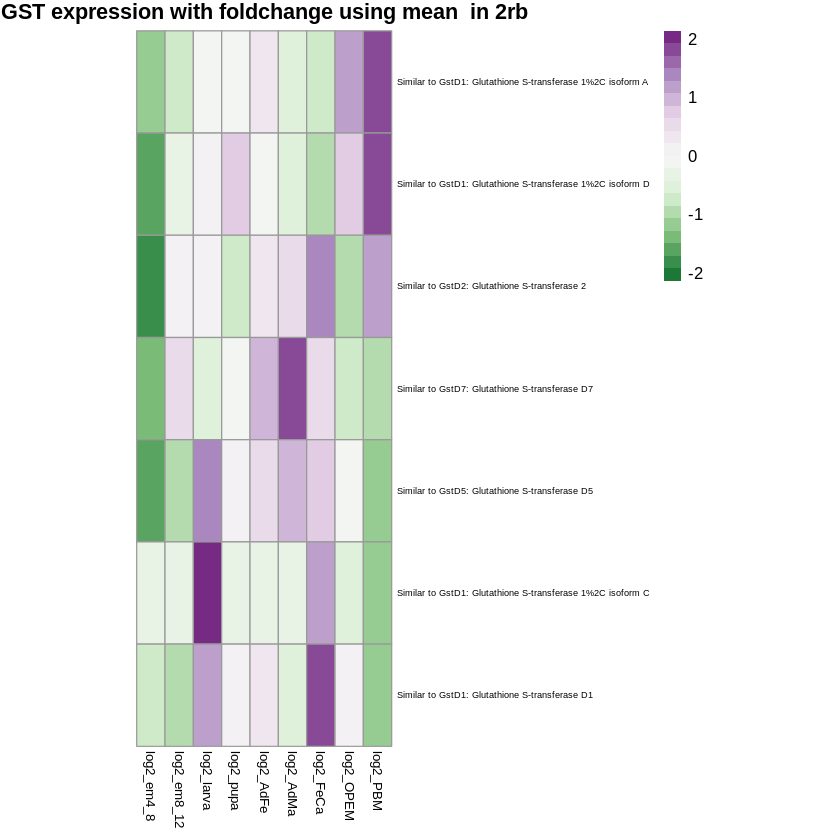

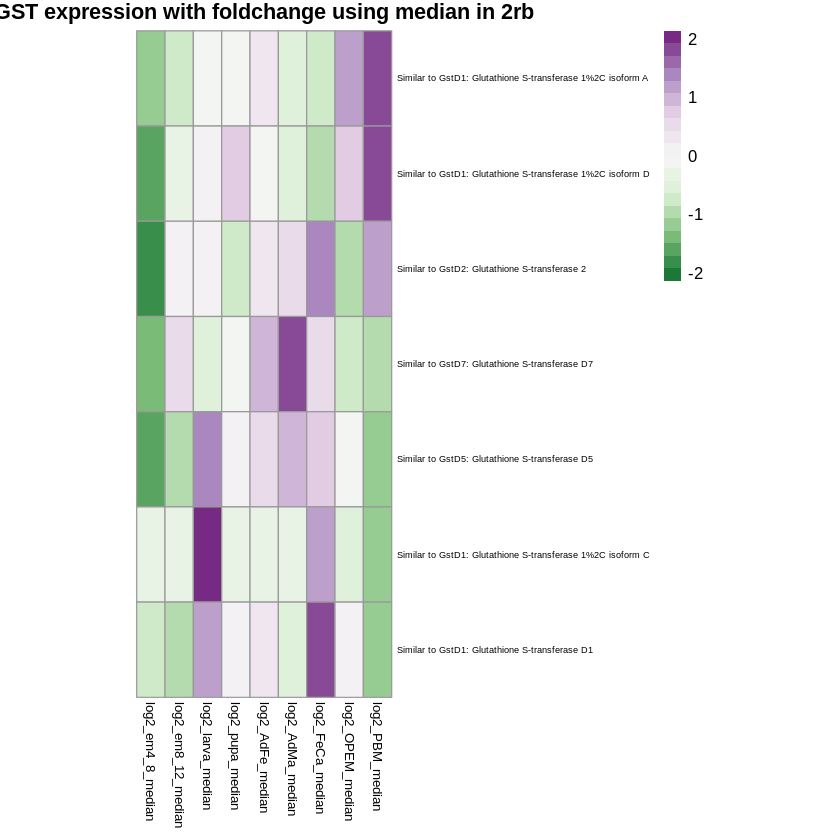

In [ ]:
GSTs=only_2rb[grep("GST",only_2rb$func ,ignore.case = T),]
pheatmap(GSTs[,1:9],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(GSTs$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="GST gene expression RPKM value in 2rb",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(GSTs[,16:24],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(GSTs$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="GST expression with foldchange using mean  in 2rb",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))
pheatmap(GSTs[,26:34],scale="row",cluster_rows = F , cluster_col=F,labels_row =paste(GSTs$func),cellwidth = 17,fontsize_row=5.5,fontsize_col=8,main="GST expression with foldchange using median in 2rb",color = colorRampPalette(rev(brewer.pal(n = 7, name = "PRGn")))(20))

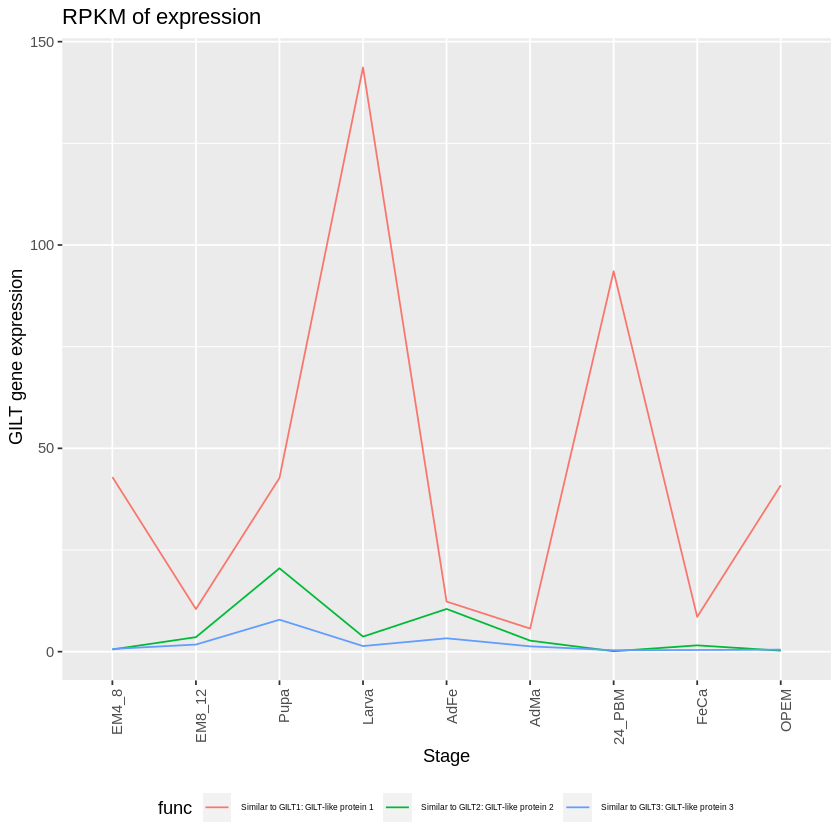

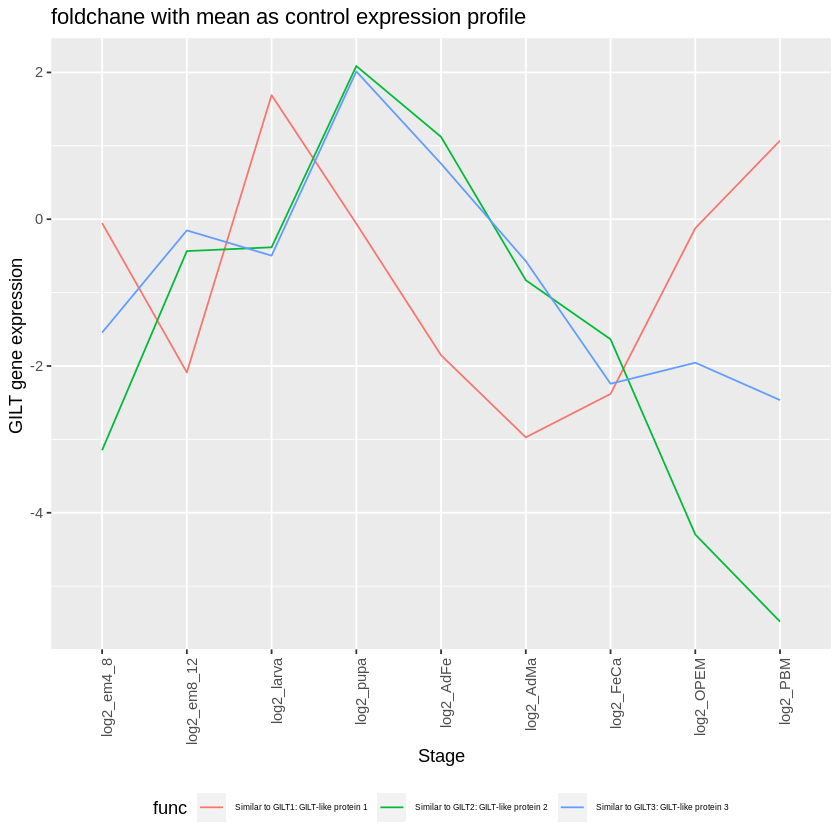

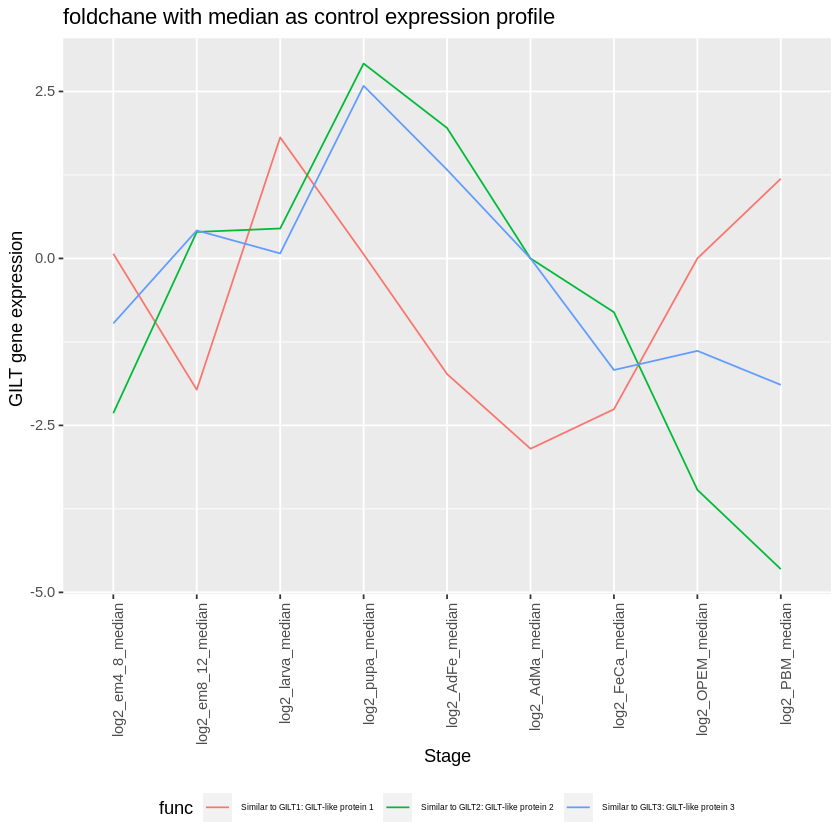

In [ ]:
GILTs=only_2rb[grep("GILT",only_2rb$func ,ignore.case = T),]
gilt_exp_val = GILTs[,1:9]
gilt_exp_val$func = GILTs$func
melted <- melt(gilt_exp_val, id.vars = "func")
ggplot(melted, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("RPKM of expression")+
  labs(y=" GILT gene expression", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

gilt_exp_val_mean = GILTs[,16:24]
gilt_exp_val_mean$func = GILTs$func
melted_mean <- melt(gilt_exp_val_mean, id.vars = "func")
ggplot(melted_mean, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("foldchane with mean as control expression profile")+
  labs(y="GILT gene expression ", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

gilt_exp_val_median = GILTs[,26:34]
gilt_exp_val_median$func = GILTs$func
melted_median <- melt(gilt_exp_val_median, id.vars = "func")
ggplot(melted_median, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("foldchane with median as control expression profile")+
  labs(y="GILT gene expression ", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

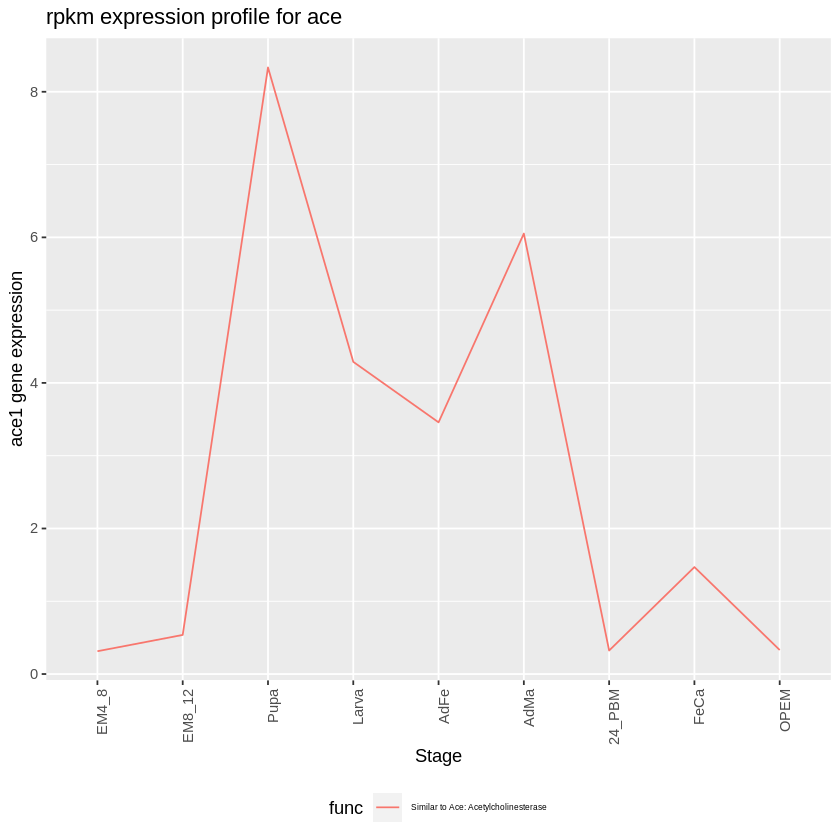

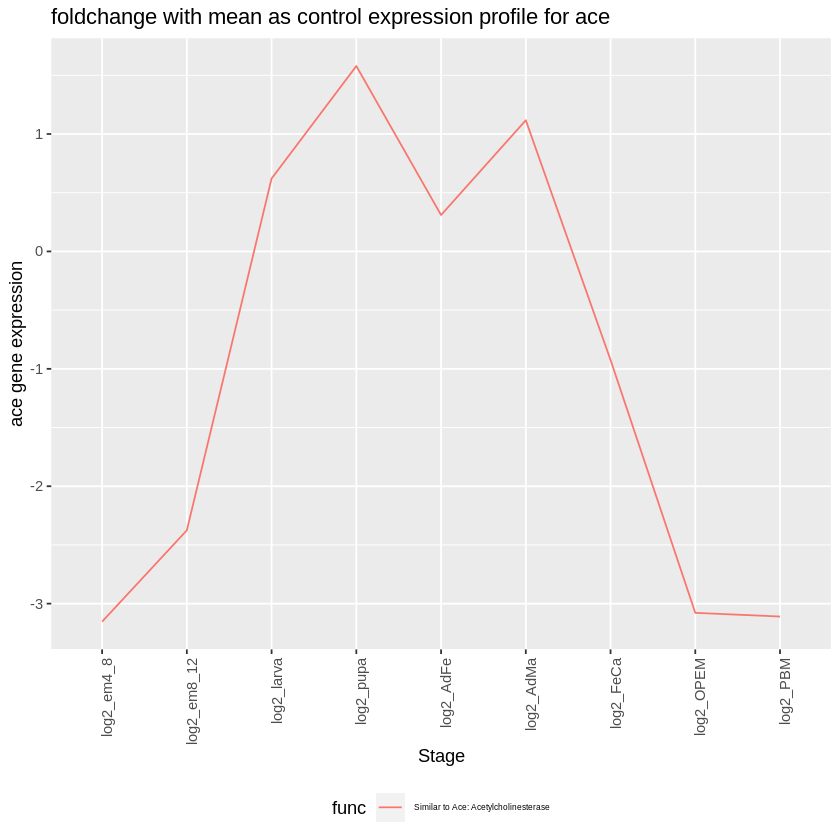

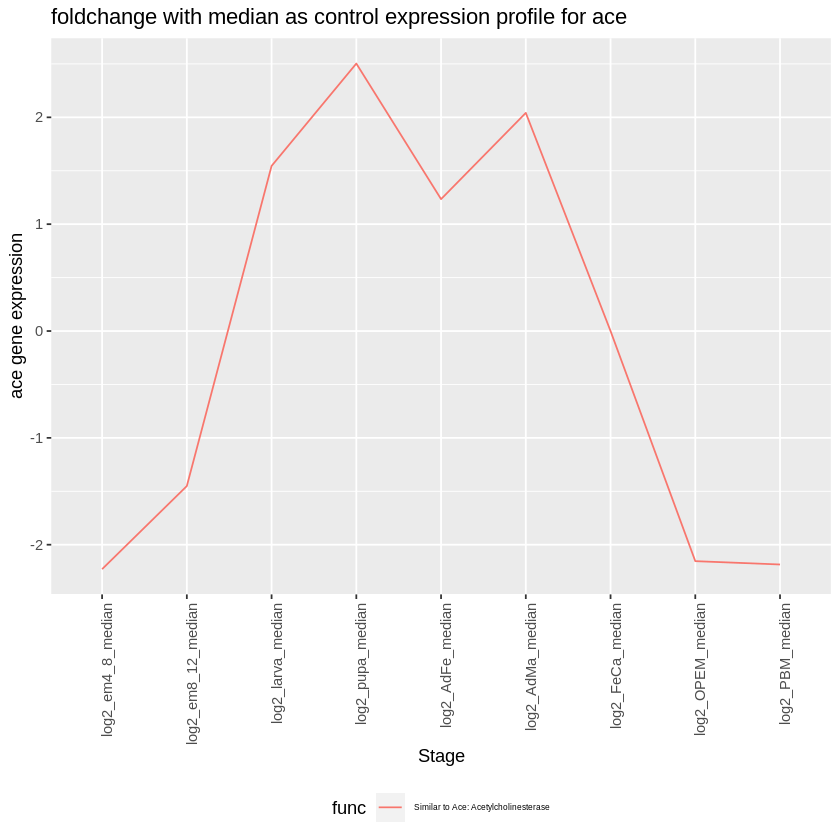

In [ ]:
ace1=only_2rb[grep("acetylcholinesterase",only_2rb$func ,ignore.case = T),]
ace1_exp_rpkm = ace1[,1:9]
ace1_exp_rpkm$func = ace1$func
melted_ace1_rpkm <- melt(ace1_exp_rpkm, id.vars = "func")
ggplot(melted_ace1_rpkm, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("rpkm expression profile for ace")+
  labs(y=" ace1 gene expression ", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

ace1_exp_mean = ace1[,16:24]
ace1_exp_mean$func = ace1$func
melted_ace1_mean<- melt(ace1_exp_mean, id.vars = "func")
ggplot(melted_ace1_mean, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("foldchange with mean as control expression profile for ace")+
  labs(y=" ace gene expression ", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")

ace1_exp_median = ace1[,26:34]
ace1_exp_median$func = ace1$func
melted_ace1_median<- melt(ace1_exp_median, id.vars = "func")
ggplot(melted_ace1_median, aes(x = variable, y = value, colour = func, group=func)) + geom_line()+
  ggtitle("foldchange with median as control expression profile for ace")+
  labs(y=" ace gene expression ", x = "Stage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+theme(legend.text=element_text(size=5))+theme(legend.position="bottom",legend.box="horizontal")


